# 1.Read file

In [ ]:
#/content/drive/MyDrive/Colab Notebooks/Nien_luan_nganh/main-code/climatic_data_Vietnam_Laos_Thailand.rdata

In [ ]:
!pip3 install pyreadr


     |████████████████████████████████| 361 kB 5.1 MB/s 


In [ ]:
import pyreadr

result = pyreadr.read_r('/content/drive/MyDrive/Colab Notebooks/Nien_luan_nganh/main-code/climatic_data_Vietnam_Laos_Thailand.rdata') # also works for Rd

print(result.keys())
df = result["data_vietnam"] 

odict_keys(['data_laos', 'data_thailand', 'data_vietnam', 'stations_laos', 'stations_vietnam'])


In [ ]:
df

year  month  station    Ta    Tx    Tm    Rf    rH     Sh    aH
0      1960      1  Honggai   NaN   NaN   NaN   NaN  81.0    NaN   NaN
1      1960      2  Honggai   NaN   NaN   NaN   NaN  79.0    NaN   NaN
2      1960      3  Honggai   NaN   NaN   NaN   NaN  90.0    NaN   NaN
3      1960      4  Honggai   NaN   NaN   NaN   NaN  83.0    NaN   NaN
4      1960      5  Honggai   NaN   NaN   NaN   NaN  81.0    NaN   NaN
...     ...    ...      ...   ...   ...   ...   ...   ...    ...   ...
32731  2010     12     Vinh  20.3  24.0  18.0  35.0  83.0   86.0  20.1
32732  2010     12  Vinhyen  19.1  23.0  16.6  29.0  80.0   87.0  17.9
32733  2010     12  Vungtau  26.7  30.4  24.3   1.0  79.0  142.0  27.6
32734  2010     12  Xuanloc   NaN   NaN   NaN   NaN   NaN    NaN  25.4
32735  2010     12   Yenbai  18.0  21.5  15.8  65.0  87.0   61.0  18.2

[32736 rows x 10 columns]

In [ ]:
df.to_csv('converted.csv', index=False)

In [ ]:
# thư viện
from pandas import read_csv
from pandas import DataFrame
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from datetime import datetime

## merge year and month

In [ ]:
def parse(x):
	return datetime.strptime(x,'%Y %m')

dataset = read_csv('converted.csv',  parse_dates = [['year', 'month']], index_col=0, date_parser=parse)
dataset

station    Ta    Tx    Tm    Rf    rH     Sh    aH
year_month                                                    
1960-01-01  Honggai   NaN   NaN   NaN   NaN  81.0    NaN   NaN
1960-02-01  Honggai   NaN   NaN   NaN   NaN  79.0    NaN   NaN
1960-03-01  Honggai   NaN   NaN   NaN   NaN  90.0    NaN   NaN
1960-04-01  Honggai   NaN   NaN   NaN   NaN  83.0    NaN   NaN
1960-05-01  Honggai   NaN   NaN   NaN   NaN  81.0    NaN   NaN
...             ...   ...   ...   ...   ...   ...    ...   ...
2010-12-01     Vinh  20.3  24.0  18.0  35.0  83.0   86.0  20.1
2010-12-01  Vinhyen  19.1  23.0  16.6  29.0  80.0   87.0  17.9
2010-12-01  Vungtau  26.7  30.4  24.3   1.0  79.0  142.0  27.6
2010-12-01  Xuanloc   NaN   NaN   NaN   NaN   NaN    NaN  25.4
2010-12-01   Yenbai  18.0  21.5  15.8  65.0  87.0   61.0  18.2

[32736 rows x 8 columns]

In [ ]:
#rename index
dataset.index.name = 'date'

# 2.Overview, drop NaN

In [ ]:
dataset.describe()

Ta            Tx            Tm            Rf            rH  \
count  31656.000000  31355.000000  31356.000000  31752.000000  31596.000000   
mean      24.136056     28.399084     21.296563    157.060837     82.946891   
std        4.352241      4.679795      4.352521    176.779286      5.263266   
min        2.500000      0.000000      0.000000      0.000000     49.000000   
25%       21.000000     25.200000     18.200000     27.600000     80.000000   
50%       25.500000     30.000000     22.600000    103.000000     84.000000   
75%       27.500000     31.900000     24.700000    234.000000     86.810000   
max       35.800000     39.300000     39.000000   2451.700000     99.000000   

                 Sh            aH  
count  30840.000000  31932.000000  
mean     160.728402     25.417506  
std       69.031249      5.832405  
min        0.000000      2.900000  
25%      113.700000     20.700000  
50%      163.600000     26.700000  
75%      207.825000     30.300000  
max      674.000000     39.900000

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32736 entries, 1960-01-01 to 2010-12-01
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  32736 non-null  object 
 1   Ta       31656 non-null  float64
 2   Tx       31355 non-null  float64
 3   Tm       31356 non-null  float64
 4   Rf       31752 non-null  float64
 5   rH       31596 non-null  float64
 6   Sh       30840 non-null  float64
 7   aH       31932 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.2+ MB


In [ ]:
#check null value
df_nan= dataset.isna()
df_sum_nan = df_nan.sum()
df_sum_nan

station       0
Ta         1080
Tx         1381
Tm         1380
Rf          984
rH         1140
Sh         1896
aH          804
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
#dataset.drop('station', inplace=True, axis=1)

In [ ]:
#dataset.head()

In [ ]:
# xóa các rows có có từ 2 giá trị NaN
#dataset.dropna(thresh=7,inplace=True)

In [ ]:
dataset

station    Ta    Tx    Tm    Rf    rH     Sh    aH
date                                                           
1961-01-01  Bacgiang  15.7  19.7  12.7   2.7  74.0  102.4  13.6
1961-01-01     Hanam  15.9  19.6  13.7  10.2  82.0   94.2  15.3
1961-01-01    Hatinh  17.0  19.9  14.9  76.0  90.0   77.3  17.8
1961-01-01   Hoabinh  15.3  20.2  11.7   2.3  81.0   89.8  14.2
1961-01-01   Honggai  15.3  19.6  12.6   2.7  74.0  117.1  13.4
...              ...   ...   ...   ...   ...   ...    ...   ...
2010-12-01   Viettri  18.9  22.2  16.5  25.0  80.0   78.0  17.7
2010-12-01      Vinh  20.3  24.0  18.0  35.0  83.0   86.0  20.1
2010-12-01   Vinhyen  19.1  23.0  16.6  29.0  80.0   87.0  17.9
2010-12-01   Vungtau  26.7  30.4  24.3   1.0  79.0  142.0  27.6
2010-12-01    Yenbai  18.0  21.5  15.8  65.0  87.0   61.0  18.2

[30479 rows x 8 columns]

In [ ]:
#check null value
df_nan= dataset.isna()
df_sum_nan = df_nan.sum()
df_sum_nan

station    0
Ta         0
Tx         0
Tm         0
Rf         0
rH         0
Sh         0
aH         0
dtype: int64

In [ ]:
# import matplotlib.pyplot as plt
# # biểu diễn dữ liệu ta thấy station ảnh hưởng tới Ta khá nhiều  => phân bố nhiệt độ giữa các
# # vùng miền tỉnh thành khác nhau.
# # nên chúng ta giữ lại station
# x=dataset.station
# y=dataset.Ta
# plt.figure(figsize=(200, 40))
# plt.scatter(x,y)

##labelEncoder for station feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset['station_encoded'] = labelencoder.fit_transform(dataset['station'])
dataset

station    Ta    Tx    Tm    Rf    rH     Sh    aH  \
date                                                              
1961-01-01  Bacgiang  15.7  19.7  12.7   2.7  74.0  102.4  13.6   
1961-01-01     Hanam  15.9  19.6  13.7  10.2  82.0   94.2  15.3   
1961-01-01    Hatinh  17.0  19.9  14.9  76.0  90.0   77.3  17.8   
1961-01-01   Hoabinh  15.3  20.2  11.7   2.3  81.0   89.8  14.2   
1961-01-01   Honggai  15.3  19.6  12.6   2.7  74.0  117.1  13.4   
...              ...   ...   ...   ...   ...   ...    ...   ...   
2010-12-01   Viettri  18.9  22.2  16.5  25.0  80.0   78.0  17.7   
2010-12-01      Vinh  20.3  24.0  18.0  35.0  83.0   86.0  20.1   
2010-12-01   Vinhyen  19.1  23.0  16.6  29.0  80.0   87.0  17.9   
2010-12-01   Vungtau  26.7  30.4  24.3   1.0  79.0  142.0  27.6   
2010-12-01    Yenbai  18.0  21.5  15.8  65.0  87.0   61.0  18.2   

            station_encoded  
date                         
1961-01-01                2  
1961-01-01               22  
1961-01-01               23  
1961-01-01               24  
1961-01-01               25  
...                     ...  
2010-12-01               59  
2010-12-01               60  
2010-12-01               61  
2010-12-01               62  
2010-12-01               64  

[30479 rows x 9 columns]

In [ ]:
df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
ana_station = dataset.station.value_counts()
ana_station = pd.DataFrame(ana_station)
ana_station.rename(columns = {'station':'month_count'}, inplace = True)
ana_station.index.name = 'station'
ana_station

month_count
station               
Bacgiang           600
Phulien            600
Yenbai             600
Vinhyen            600
Vinh               600
...                ...
Dongphu            360
Hue                360
Phuoclong          348
Xuanloc            168
Bacninh            132

[65 rows x 1 columns]

In [ ]:
# số station có dữ liệu không đủ 50 năm
ana_station[ana_station['month_count'] < 600].count()

month_count    48
dtype: int64

In [ ]:
# số dữ liệu của Ha Nam
dataset[dataset['station_encoded']==22]['station'].value_counts()

Hanam    600
Name: station, dtype: int64

#3.Fill data station = 8 - Cantho - Sapa - Danang

In [ ]:
# số dữ liệu của Can Tho
dataset[dataset['station']=='Cantho']['station_encoded'].value_counts()

8    384
Name: station_encoded, dtype: int64

In [ ]:
# số dữ liệu của Sapa
dataset[dataset['station']=='Sapa']['station_encoded'].value_counts()

47    600
Name: station_encoded, dtype: int64

In [ ]:
# số dữ liệu của Đà nẵng
dataset[dataset['station']=='Danang']['station_encoded'].value_counts()

14    384
Name: station_encoded, dtype: int64

In [ ]:
df_new_8= dataset[dataset['station_encoded'] == 8]
df_new_8

station    Ta    Tx    Tm     Rf    rH     Sh    aH  \
date                                                             
1979-01-01  Cantho  25.6  30.2  22.3    0.0  78.0  288.7  25.2   
1979-02-01  Cantho  26.4  31.4  22.7    0.0  76.0  265.5  26.0   
1979-03-01  Cantho  27.6  32.9  23.6    0.1  77.0  284.8  28.1   
1979-04-01  Cantho  27.9  32.9  24.5  117.9  83.0  238.0  30.6   
1979-05-01  Cantho  28.1  32.5  25.0   87.1  85.0  202.0  31.7   
...            ...   ...   ...   ...    ...   ...    ...   ...   
2010-08-01  Cantho  27.1  31.8  24.4  204.0  87.0  183.0  30.9   
2010-09-01  Cantho  27.6  32.3  24.6  121.0  85.0  188.0  31.0   
2010-10-01  Cantho  26.9  31.0  24.2  265.0  86.0  162.0  30.0   
2010-11-01  Cantho  27.0  30.9  24.2  204.0  85.0  182.0  29.5   
2010-12-01  Cantho  26.4  30.4  23.3   82.0  82.0  169.0  27.9   

            station_encoded  
date                         
1979-01-01                8  
1979-02-01                8  
1979-03-01                8  
1979-04-01                8  
1979-05-01                8  
...                     ...  
2010-08-01                8  
2010-09-01                8  
2010-10-01                8  
2010-11-01                8  
2010-12-01                8  

[384 rows x 9 columns]

In [ ]:
df_new_8.describe()

Ta          Tx          Tm          Rf          rH          Sh  \
count  384.000000  384.000000  384.000000  384.000000  384.000000  384.000000   
mean    26.842187   31.352865   24.012760  133.159896   84.086276  202.660156   
std      0.985901    1.316611    1.025074  119.470364    4.271644   65.408187   
min     24.300000   28.200000   19.700000    0.000000   71.000000    0.000000   
25%     26.300000   30.400000   23.500000   10.825000   80.000000  165.300000   
50%     26.800000   31.200000   24.200000  121.000000   84.315000  199.350000   
75%     27.400000   32.225000   24.600000  223.050000   88.000000  245.975000   
max     30.000000   34.900000   26.700000  493.100000   92.000000  674.000000   

               aH  
count  384.000000  
mean    29.427604  
std      2.094259  
min     24.200000  
25%     27.675000  
50%     30.400000  
75%     31.000000  
max     33.600000

In [ ]:
df_new_47 = dataset[dataset['station_encoded'] == 47]
df_new_47

station    Ta    Tx    Tm     Rf    rH     Sh    aH  \
date                                                             
1961-01-01    Sapa   8.7  13.1   5.6   15.4  85.0  143.1   9.6   
1961-02-01    Sapa   9.2  12.4   7.1  232.4  93.0   60.3  10.7   
1961-03-01    Sapa  14.2  18.4  11.2  181.6  87.0  127.4  13.6   
1961-04-01    Sapa  17.7  22.0  14.5  260.0  81.0  161.6  15.9   
1961-05-01    Sapa  18.5  22.3  16.0  189.1  87.0   96.0  18.5   
...            ...   ...   ...   ...    ...   ...    ...   ...   
2010-08-01    Sapa  19.2  22.3  17.3  412.0  94.0   83.0  21.0   
2010-09-01    Sapa  19.4  22.9  17.2  288.0  94.0   93.0  21.0   
2010-10-01    Sapa  16.0  18.9  13.8  195.0  93.0   86.0  17.0   
2010-11-01    Sapa  11.8  15.8  10.0   41.0  91.0  131.0  13.0   
2010-12-01    Sapa  10.9  14.3   8.7  185.0  93.0   93.0  12.2   

            station_encoded  
date                         
1961-01-01               47  
1961-02-01               47  
1961-03-01               47  
1961-04-01               47  
1961-05-01               47  
...                     ...  
2010-08-01               47  
2010-09-01               47  
2010-10-01               47  
2010-11-01               47  
2010-12-01               47  

[600 rows x 9 columns]

In [ ]:
df_new_47.describe()

Ta          Tx          Tm          Rf          rH          Sh  \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean    15.323167   18.955667   12.965500  233.607333   87.121617  120.918667   
std      4.180703    4.089018    4.348299  183.370694    5.561951   44.285443   
min      3.800000    5.700000    2.600000    5.200000   58.000000   14.000000   
25%     11.700000   15.575000    9.200000   75.850000   84.000000   91.500000   
50%     16.300000   20.100000   14.000000  196.300000   88.000000  117.050000   
75%     19.100000   22.600000   17.000000  346.425000   91.000000  147.525000   
max     21.800000   25.200000   24.100000  984.200000   99.000000  554.000000   

               aH  
count  600.000000  
mean    15.448000  
std      3.995932  
min      7.300000  
25%     11.400000  
50%     16.050000  
75%     19.300000  
max     21.800000

In [ ]:
df_new_14 = dataset[dataset['station_encoded'] == 14]
df_new_14

station    Ta    Tx    Tm     Rf    rH     Sh    aH  \
date                                                             
1979-01-01  Danang  23.2  27.4  20.1   28.2  84.0  200.3  23.7   
1979-02-01  Danang  23.6  28.8  20.0    3.9  82.0  211.8  23.8   
1979-03-01  Danang  25.5  30.2  23.0    1.8  83.0  200.2  27.1   
1979-04-01  Danang  27.2  31.7  24.1   13.2  81.0  223.7  29.3   
1979-05-01  Danang  28.1  33.1  24.8  215.5  80.0  225.8  30.2   
...            ...   ...   ...   ...    ...   ...    ...   ...   
2010-08-01  Danang  28.1  32.7  24.9  326.0  82.0  212.0  30.8   
2010-09-01  Danang  27.7  32.8  24.5  166.0  83.0  203.0  30.4   
2010-10-01  Danang  25.9  29.2  23.6  656.0  85.0  102.0  28.3   
2010-11-01  Danang  23.7  26.0  22.1  546.0  88.0   49.0  25.6   
2010-12-01  Danang  22.5  25.9  20.2   52.0  84.0  104.0  23.0   

            station_encoded  
date                         
1979-01-01               14  
1979-02-01               14  
1979-03-01               14  
1979-04-01               14  
1979-05-01               14  
...                     ...  
2010-08-01               14  
2010-09-01               14  
2010-10-01               14  
2010-11-01               14  
2010-12-01               14  

[384 rows x 9 columns]

In [ ]:
df_new_14.describe()

Ta          Tx          Tm           Rf          rH  \
count  384.000000  384.000000  384.000000   384.000000  384.000000   
mean    25.840104   30.002604   23.372396   188.892708   82.117083   
std      2.824669    3.535378    2.966113   249.152402    3.998712   
min     19.400000   22.000000   17.300000     0.000000   71.000000   
25%     23.400000   26.900000   21.200000    32.525000   80.000000   
50%     26.300000   30.200000   23.900000    87.950000   83.000000   
75%     28.400000   33.200000   25.200000   220.425000   85.000000   
max     30.600000   36.300000   37.700000  1376.000000   90.000000   

               Sh          aH  
count  384.000000  384.000000  
mean   183.014844   27.334635  
std     62.759351    3.452274  
min     11.700000   17.900000  
25%    136.800000   24.300000  
50%    186.050000   28.700000  
75%    232.575000   30.300000  
max    316.900000   33.900000

In [ ]:
#drop station column
df_new_8.drop('station', inplace=True, axis=1)
df_new_8.drop('station_encoded', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#drop station column
df_new_14.drop('station', inplace=True, axis=1)
df_new_14.drop('station_encoded', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#drop station column
df_new_47.drop('station', inplace=True, axis=1)
df_new_47.drop('station_encoded', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_new_8.head()

Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1979-01-01  25.6  30.2  22.3    0.0  78.0  288.7  25.2
1979-02-01  26.4  31.4  22.7    0.0  76.0  265.5  26.0
1979-03-01  27.6  32.9  23.6    0.1  77.0  284.8  28.1
1979-04-01  27.9  32.9  24.5  117.9  83.0  238.0  30.6
1979-05-01  28.1  32.5  25.0   87.1  85.0  202.0  31.7

In [ ]:
df_new_14.head()

Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1979-01-01  23.2  27.4  20.1   28.2  84.0  200.3  23.7
1979-02-01  23.6  28.8  20.0    3.9  82.0  211.8  23.8
1979-03-01  25.5  30.2  23.0    1.8  83.0  200.2  27.1
1979-04-01  27.2  31.7  24.1   13.2  81.0  223.7  29.3
1979-05-01  28.1  33.1  24.8  215.5  80.0  225.8  30.2

In [ ]:
df_new_47.head()

Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1961-01-01   8.7  13.1   5.6   15.4  85.0  143.1   9.6
1961-02-01   9.2  12.4   7.1  232.4  93.0   60.3  10.7
1961-03-01  14.2  18.4  11.2  181.6  87.0  127.4  13.6
1961-04-01  17.7  22.0  14.5  260.0  81.0  161.6  15.9
1961-05-01  18.5  22.3  16.0  189.1  87.0   96.0  18.5

## Display data Can Tho

### Temperature average


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5813afbd50>]],
      dtype=object)

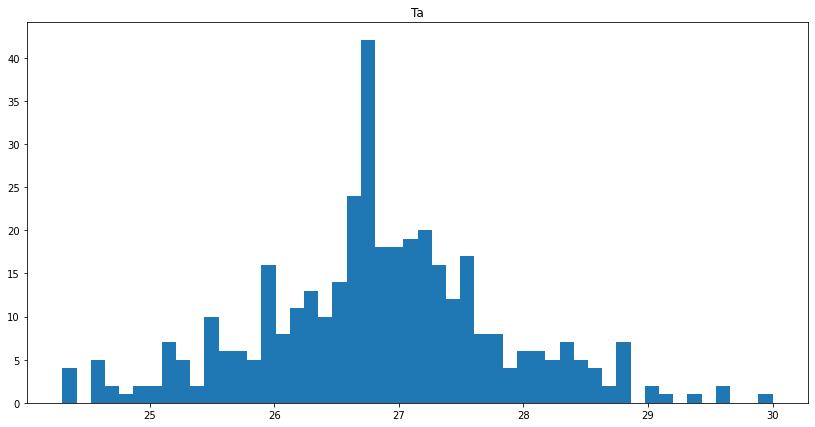

In [ ]:
# Temperature average
import seaborn as sns
import matplotlib.pyplot as plt
df_new_8.hist(column = 'Ta', grid = False,figsize = (14,7), bins=50)

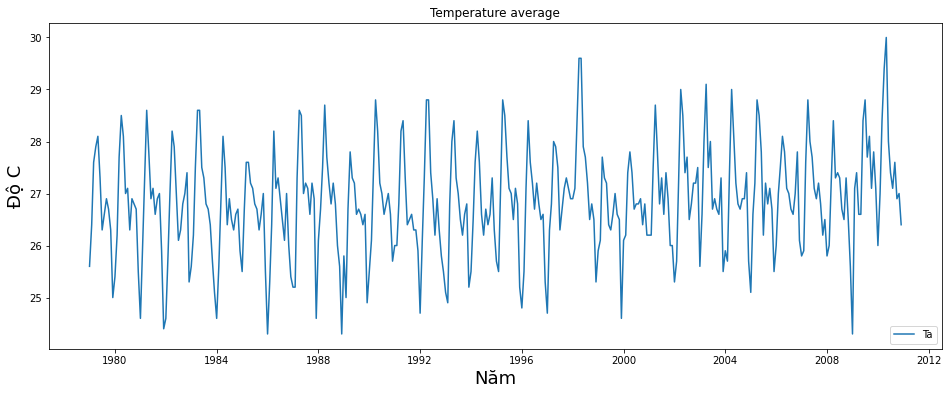

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Temperature average')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(df_new_8['Ta'])
plt.legend(['Ta'],loc='lower right')
plt.show()

### Maximal Temperature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5812c85ed0>]],
      dtype=object)

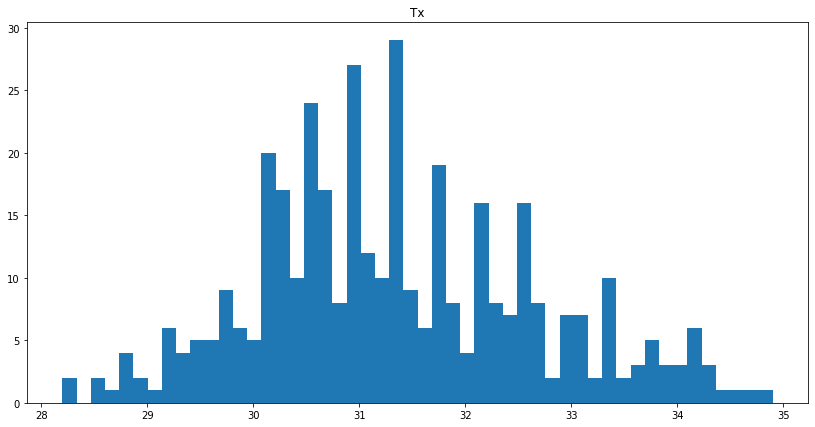

In [ ]:
# Maximal Temperature
import seaborn as sns
import matplotlib.pyplot as plt
df_new_8.hist(column = 'Tx', grid = False,figsize = (14,7), bins=50)

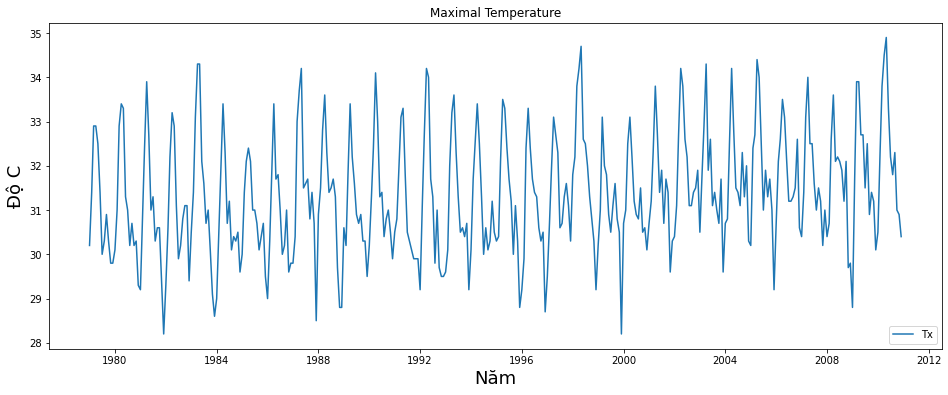

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Maximal Temperature')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(df_new_8['Tx'])
plt.legend(['Tx'],loc='lower right')
plt.show()

### Minimal Temperature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5811376c50>]],
      dtype=object)

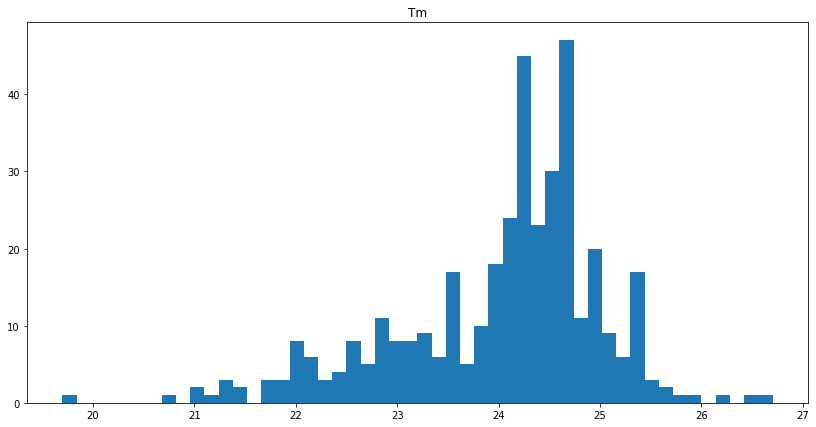

In [ ]:
# Minimal Temperature
import seaborn as sns
import matplotlib.pyplot as plt
df_new_8.hist(column = 'Tm', grid = False,figsize = (14,7), bins=50)

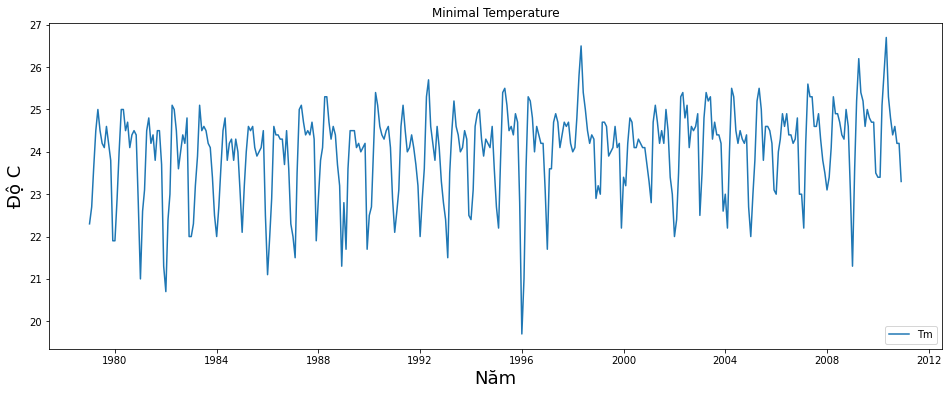

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Minimal Temperature')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(df_new_8['Tm'])
plt.legend(['Tm'],loc='lower right')
plt.show()

### RainFall

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f581139fe10>]],
      dtype=object)

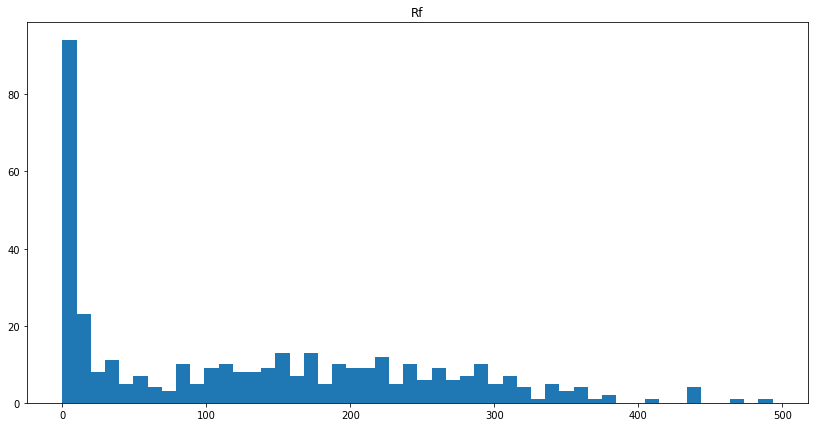

In [ ]:
# RainFall
import seaborn as sns
import matplotlib.pyplot as plt
df_new_8.hist(column = 'Rf', grid = False,figsize = (14,7), bins=50)

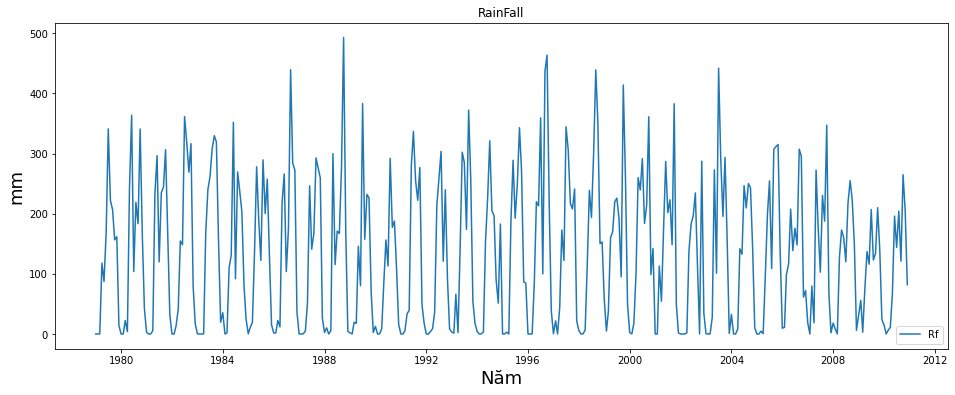

In [ ]:
plt.figure(figsize=(16,6))
plt.title('RainFall')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm", fontsize=18)
plt.plot(df_new_8['Rf'])
plt.legend(['Rf'],loc='lower right')
plt.show()

### Relative humidity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f581116ce10>]],
      dtype=object)

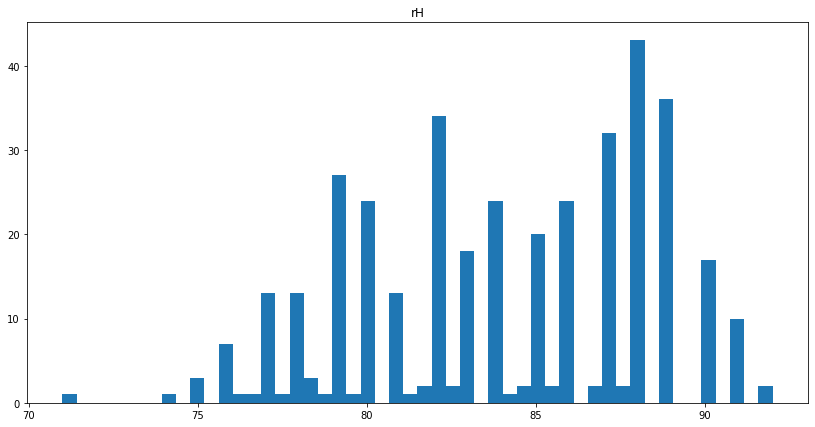

In [ ]:
# Relative humidity
import seaborn as sns
import matplotlib.pyplot as plt
df_new_8.hist(column = 'rH', grid = False,figsize = (14,7), bins=50)

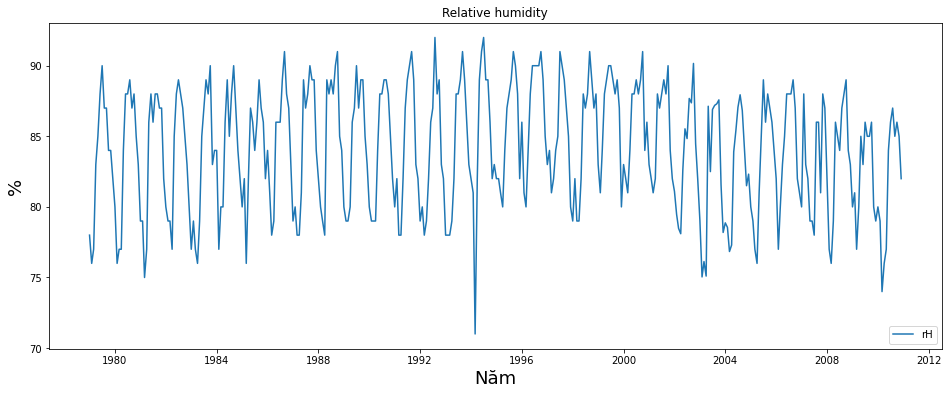

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Relative humidity')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("%", fontsize=18)
plt.plot(df_new_8['rH'])
plt.legend(['rH'],loc='lower right')
plt.show()

### Hours of sunshine

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5810f87c50>]],
      dtype=object)

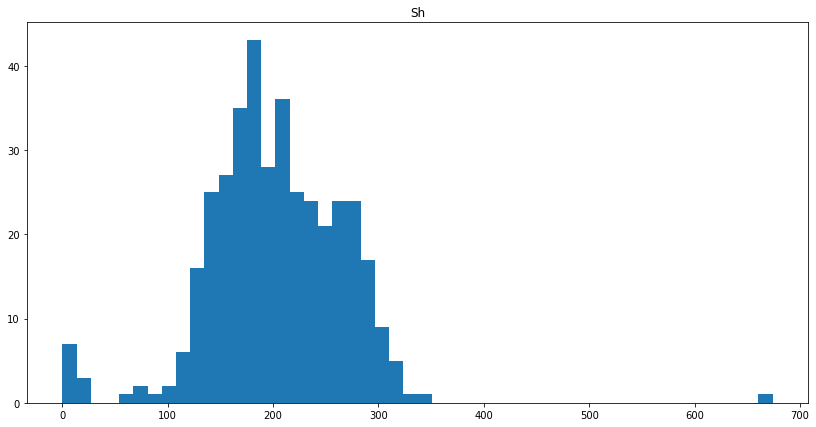

In [ ]:
# Hours of sunshine
import seaborn as sns
import matplotlib.pyplot as plt
df_new_8.hist(column = 'Sh', grid = False,figsize = (14,7), bins=50)

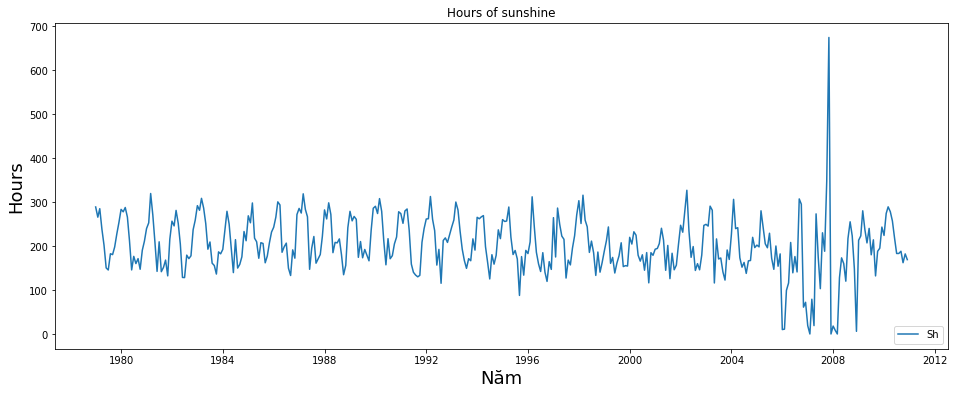

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Hours of sunshine')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.plot(df_new_8['Sh'])
plt.legend(['Sh'],loc='lower right')
plt.show()

### Absolute humidity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5810e97cd0>]],
      dtype=object)

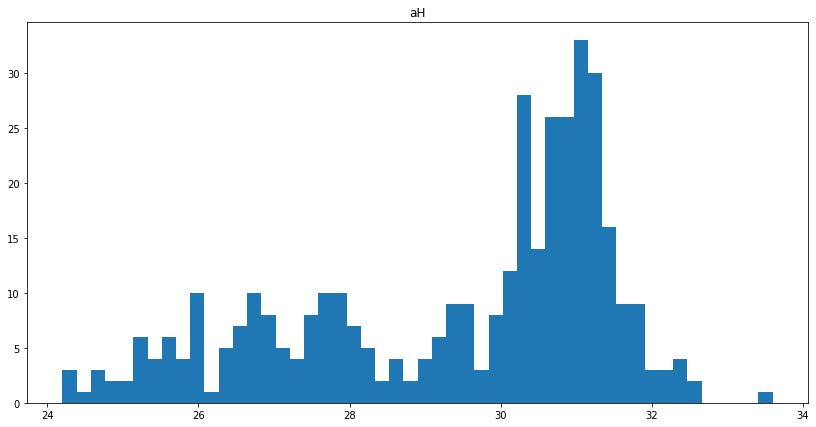

In [ ]:
# Absolute humidity
import seaborn as sns
import matplotlib.pyplot as plt
df_new_8.hist(column = 'aH', grid = False,figsize = (14,7), bins=50)

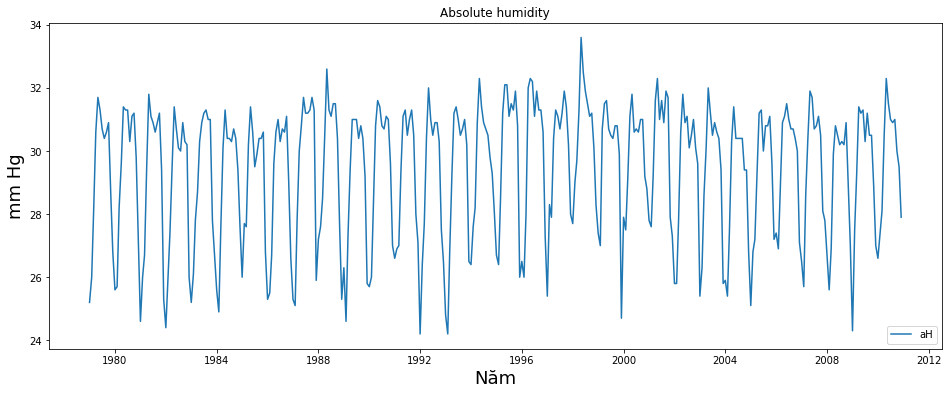

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Absolute humidity')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm Hg", fontsize=18)
plt.plot(df_new_8['aH'])
plt.legend(['aH'],loc='lower right')
plt.show()

# 4.1 Train with all attribute [CanTho]

##overview

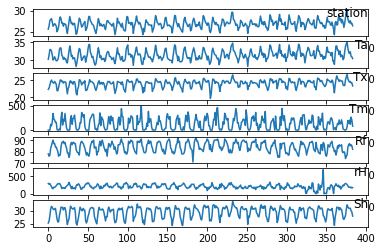

In [ ]:
#get values
df_new_v=df_new_8.values
# plot dữ liệu: với 7 thuộc tính (trừ wnd-dir)
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
pyplot.figure()
# plot each column
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(df_new_v[:, group])
	#thêm comment
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1

pyplot.show()

## % train_data_set

In [ ]:
import numpy as np
train_data_set_8 = df_new_8
train_data_set_8_v=train_data_set_8.values
print(train_data_set_8)
# xác định % của tập dữ liệu dùng để train
train_data_len = int(len(train_data_set_8_v)*.80)
print(train_data_len)

              Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1979-01-01  25.6  30.2  22.3    0.0  78.0  288.7  25.2
1979-02-01  26.4  31.4  22.7    0.0  76.0  265.5  26.0
1979-03-01  27.6  32.9  23.6    0.1  77.0  284.8  28.1
1979-04-01  27.9  32.9  24.5  117.9  83.0  238.0  30.6
1979-05-01  28.1  32.5  25.0   87.1  85.0  202.0  31.7
...          ...   ...   ...    ...   ...    ...   ...
2010-08-01  27.1  31.8  24.4  204.0  87.0  183.0  30.9
2010-09-01  27.6  32.3  24.6  121.0  85.0  188.0  31.0
2010-10-01  26.9  31.0  24.2  265.0  86.0  162.0  30.0
2010-11-01  27.0  30.9  24.2  204.0  85.0  182.0  29.5
2010-12-01  26.4  30.4  23.3   82.0  82.0  169.0  27.9

[384 rows x 7 columns]
307


##scales data

In [ ]:
#scale data
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = RobustScaler()
#scaler = StandardScaler()
scaled = scaler.fit_transform(train_data_set_8_v)
scaled.shape

(384, 7)

In [ ]:
scaled

array([[0.22807018, 0.29850746, 0.37142857, ..., 0.33333333, 0.42833828,
        0.10638298],
       [0.36842105, 0.47761194, 0.42857143, ..., 0.23809524, 0.39391691,
        0.19148936],
       [0.57894737, 0.70149254, 0.55714286, ..., 0.28571429, 0.42255193,
        0.41489362],
       ...,
       [0.45614035, 0.41791045, 0.64285714, ..., 0.71428571, 0.24035608,
        0.61702128],
       [0.47368421, 0.40298507, 0.64285714, ..., 0.66666667, 0.27002967,
        0.56382979],
       [0.36842105, 0.32835821, 0.51428571, ..., 0.52380952, 0.25074184,
        0.39361702]])

##train data

In [ ]:
# train_data = scaled[0:train_data_len, :]
# print(train_data.shape)
# x_train = []
# y_train = []

# # tạo bộ x_train=( samples, 12 time_steps, 7 feature)
# for i in range(12, len(train_data)): #len(train_data) = 307
#   # 12 tháng đầu tiên làm x_train
#   x_train.append(train_data[i-12:i,:])
#   # tháng 13 liền kề làm y_train => tạo 295 bộ như thế.
#   y_train.append(train_data[i,:])
#   if i <=13:
#     print("x_train: ")
#     print(x_train)
#     print("y_train: ")
#     print(y_train)
# #convert into np.array
# x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train.shape)
# # reshape x_train: chuyển thành 3D array
# #x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
# print(x_train.shape)
# print(y_train.shape)

In [ ]:
train_data = scaled[0:train_data_len, :]
print(train_data.shape)
x_train = []
y_train = []

# tạo bộ x_train=( samples, 24 time_steps, 7 feature)
for i in range(24, len(train_data)): #len(train_data) = 307
  # 24 tháng đầu tiên làm x_train
  x_train.append(train_data[i-24:i,:])
  # tháng 25 liền kề làm y_train => tạo 283 bộ như thế.
  y_train.append(train_data[i,:])
  if i <=25:
    print("x_train: ")
    print(x_train)
    print("y_train: ")
    print(y_train)
#convert into np.array
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
# reshape x_train: chuyển thành 3D array
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
print(x_train.shape)
print(y_train.shape)

(307, 7)
x_train: 
[array([[2.28070175e-01, 2.98507463e-01, 3.71428571e-01, 0.00000000e+00,
        3.33333333e-01, 4.28338279e-01, 1.06382979e-01],
       [3.68421053e-01, 4.77611940e-01, 4.28571429e-01, 0.00000000e+00,
        2.38095238e-01, 3.93916914e-01, 1.91489362e-01],
       [5.78947368e-01, 7.01492537e-01, 5.57142857e-01, 2.02798621e-04,
        2.85714286e-01, 4.22551929e-01, 4.14893617e-01],
       [6.31578947e-01, 7.01492537e-01, 6.85714286e-01, 2.39099574e-01,
        5.71428571e-01, 3.53115727e-01, 6.80851064e-01],
       [6.66666667e-01, 6.41791045e-01, 7.57142857e-01, 1.76637599e-01,
        6.66666667e-01, 2.99703264e-01, 7.97872340e-01],
       [5.26315789e-01, 4.77611940e-01, 6.85714286e-01, 3.42526871e-01,
        8.09523810e-01, 2.22700297e-01, 7.55319149e-01],
       [3.50877193e-01, 2.68656716e-01, 6.42857143e-01, 6.91543298e-01,
        9.04761905e-01, 2.15875371e-01, 6.91489362e-01],
       [4.03508772e-01, 3.13432836e-01, 6.28571429e-01, 4.50415737e-01,
     

In [ ]:
# train_data = scaled[0:train_data_len, :]
# print(train_data.shape)
# x_train = []
# y_train = []

# # tạo bộ x_train=( samples, 36 time_steps, 7 feature)
# for i in range(36, len(train_data)): #len(train_data) = 307
#   # 36 tháng đầu tiên làm x_train
#   x_train.append(train_data[i-36:i,:])
#   # tháng 37 liền kề làm y_train => tạo 271 bộ như thế.
#   y_train.append(train_data[i,:])
#   if i <=37:
#     print("x_train: ")
#     print(x_train)
#     print("y_train: ")
#     print(y_train)
# #convert into np.array
# x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train.shape)
# # reshape x_train: chuyển thành 3D array
# #x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
# print(x_train.shape)
# print(y_train.shape)

## build model

In [ ]:
#from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential() #mô hình tuần tự

model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(16, return_sequences = False))
model.add(Dense(7))



model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, batch_size=1, epochs=50)
print(model.summary())

Epoch 1/50
283/283 [==============================] - 11s 19ms/step - loss: 0.0437
Epoch 2/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0360
Epoch 3/50
283/283 [==============================] - 6s 20ms/step - loss: 0.0172
Epoch 4/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0147
Epoch 5/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0134
Epoch 6/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0125
Epoch 7/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0122
Epoch 8/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0129
Epoch 9/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0114
Epoch 10/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0116
Epoch 11/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0113
Epoch 12/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0112
Epoch 13/50


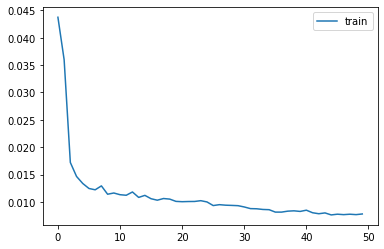

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

##test_data and predict

In [ ]:
# # phải - 12 vì sẽ phải dự đó cho 13 trở về sau.
# test_data = scaled[train_data_len - 12: , :]
# x_test = []
# # chú ý y_test phải là giá trị chưa scale
# y_test = train_data_set_8_v[train_data_len: , :]
# for i in range(12, len(test_data)):
#   x_test.append(test_data[i-12:i, :])
#   if i<=13:
#     print(x_test)
# x_test = np.array(x_test)
# #x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
# print(x_test.shape)

In [ ]:
# phải - 24 vì sẽ phải dự đó cho 25 trở về sau.
test_data = scaled[train_data_len - 24: , :]
x_test = []
# y_test là giá trị chưa scale
y_test = train_data_set_8_v[train_data_len: , :]
for i in range(24, len(test_data)):
  x_test.append(test_data[i-24:i, :])
  if i<=25:
    print(x_test)
x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
print(x_test.shape)

[array([[0.38596491, 0.43283582, 0.62857143, 0.47556277, 0.79428571,
        0.21424332, 0.62765957],
       [0.43859649, 0.43283582, 0.7       , 0.22591766, 0.77952381,
        0.23709199, 0.67021277],
       [0.50877193, 0.47761194, 0.68571429, 0.        , 0.91238095,
        0.21646884, 0.72340426],
       [0.50877193, 0.49253731, 0.7       , 0.58264044, 0.64142857,
        0.26602374, 0.62765957],
       [0.56140351, 0.55223881, 0.74285714, 0.07016832, 0.52238095,
        0.36617211, 0.57446809],
       [0.22807018, 0.34328358, 0.4       , 0.00101399, 0.38380952,
        0.36973294, 0.12765957],
       [0.40350877, 0.53731343, 0.54285714, 0.        , 0.19238095,
        0.36379822, 0.22340426],
       [0.64912281, 0.70149254, 0.72857143, 0.        , 0.24428571,
        0.43115727, 0.46808511],
       [0.84210526, 0.91044776, 0.81428571, 0.05658082, 0.1952381 ,
        0.41735905, 0.62765957],
       [0.56140351, 0.55223881, 0.78571429, 0.55343744, 0.76809524,
        0.17195846, 0.

In [ ]:
# # phải - 36 vì sẽ phải dự đó cho 37 trở về sau.
# test_data = scaled[train_data_len - 36: , :]
# x_test = []
# # chú ý y_test phải là giá trị chưa scale
# y_test = train_data_set_8_v[train_data_len: , :]
# for i in range(36, len(test_data)):
#   x_test.append(test_data[i-36:i, :])
#   if i<=37:
#     print(x_test)
# x_test = np.array(x_test)
# #x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
# print(x_test.shape)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 2.67999306e+01,  3.10589619e+01,  2.44095669e+01,
         2.36211319e+02,  8.77254410e+01,  1.63158875e+02,
         3.07162495e+01],
       [ 2.67285213e+01,  3.09754372e+01,  2.44215450e+01,
         2.53469269e+02,  8.80455627e+01,  1.55661850e+02,
         3.08285351e+01],
       [ 2.67335243e+01,  3.08425350e+01,  2.44347000e+01,
         2.62973358e+02,  8.78770676e+01,  1.53020157e+02,
         3.08975830e+01],
       [ 2.68108177e+01,  3.06743317e+01,  2.43708420e+01,
         1.79556274e+02,  8.51188812e+01,  1.81640884e+02,
         2.99162769e+01],
       [ 2.57607174e+01,  2.99735603e+01,  2.29615250e+01,
         3.45543442e+01,  8.07443085e+01,  2.18005219e+02,
         2.69111118e+01],
       [ 2.55974808e+01,  3.02086697e+01,  2.23826618e+01,
         1.04964418e+01,  7.99077148e+01,  2.50136551e+02,
         2.60675945e+01],
       [ 2.62180481e+01,  3.11880035e+01,  2.27492428e+01,
         5.31249952e+00,  7.86329880e+01,  2.68574219e+02,
         2.6423685

##rmse

In [ ]:
df_new_8.head()

Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1979-01-01  25.6  30.2  22.3    0.0  78.0  288.7  25.2
1979-02-01  26.4  31.4  22.7    0.0  76.0  265.5  26.0
1979-03-01  27.6  32.9  23.6    0.1  77.0  284.8  28.1
1979-04-01  27.9  32.9  24.5  117.9  83.0  238.0  30.6
1979-05-01  28.1  32.5  25.0   87.1  85.0  202.0  31.7

In [ ]:
#rmse
rmse_list=[]
for i in range(y_test.shape[1]):
  rmse = np.sqrt(np.mean(((predictions[:,i]-y_test[:,i])**2)))
  rmse_list.append(rmse)
  print("rmse of ",i," is: ",rmse)

rmse of  0  is:  0.6820195674395932
rmse of  1  is:  0.8564067502419317
rmse of  2  is:  0.49036516061814206
rmse of  3  is:  67.53338178414319
rmse of  4  is:  3.2687604855167676
rmse of  5  is:  114.97666349530546
rmse of  6  is:  0.9395616201391798


In [ ]:
#mae
mae_list=[]
for i in range(y_test.shape[1]):
  mae = np.mean(abs(y_test[:,i]-predictions[:,i]))
  mae_list.append(mae)
  print("mae of ",i," is: ",mae)

mae of  0  is:  0.5068000050334189
mae of  1  is:  0.6827068824272651
mae of  2  is:  0.37873618386008523
mae of  3  is:  51.27342019383009
mae of  4  is:  2.4607227315531146
mae of  5  is:  73.52516249619521
mae of  6  is:  0.6787397409414317


#4.2 Biểu đồ predict vs y_test [CanTho]

###plot Ta predict

In [ ]:
dt_ta = df_new_8.filter(['Ta'])
train_vi = dt_ta[:train_data_len]
x_test_vi = dt_ta[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 0.6820195674395932


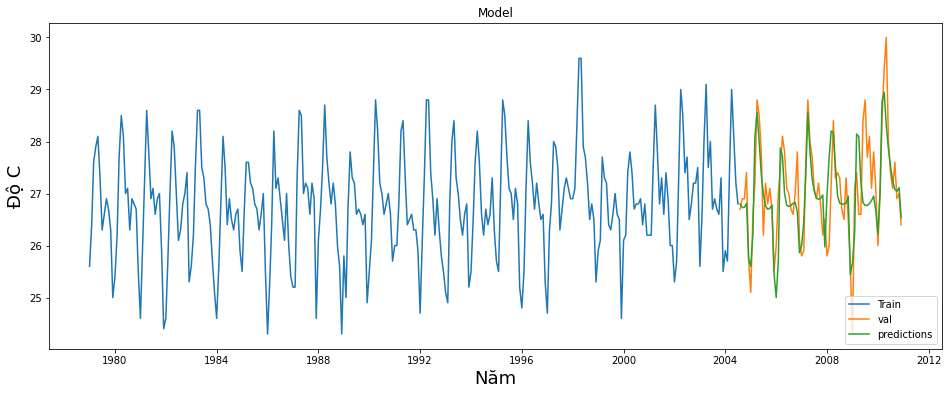

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Ta'])
plt.plot(x_test_vi[['Ta','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[0])

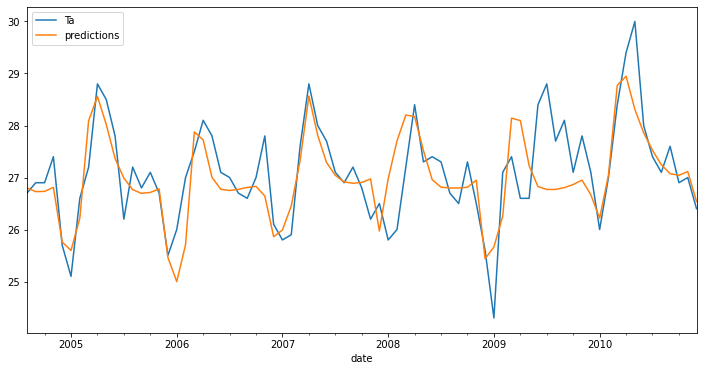

In [ ]:
x_test_vi[['Ta','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Tx predict

In [ ]:
dt_Tx = df_new_8.filter(['Tx'])
train_vi = dt_Tx[:train_data_len]
x_test_vi = dt_Tx[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 0.8564067502419317


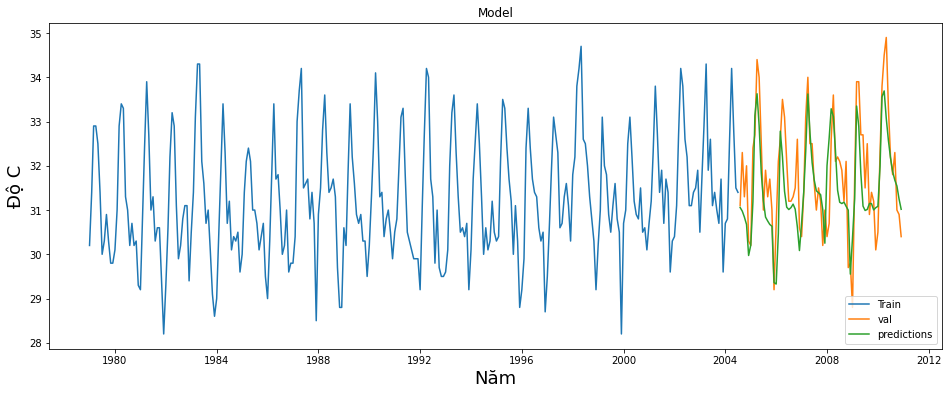

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Tx'])
plt.plot(x_test_vi[['Tx','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[1])

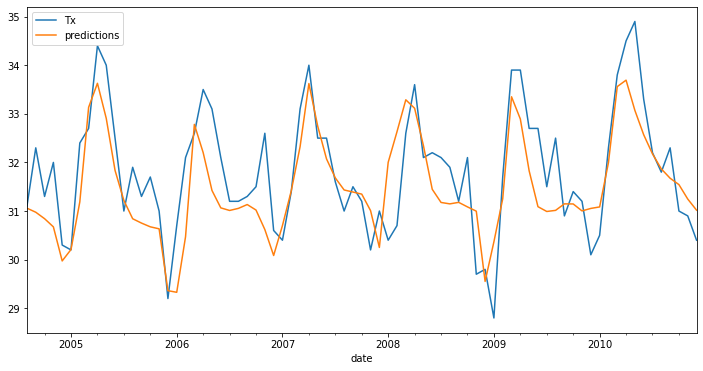

In [ ]:
x_test_vi[['Tx','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Tm predict

In [ ]:
dt_Tm = df_new_8.filter(['Tm'])
train_vi = dt_Tm[:train_data_len]
x_test_vi = dt_Tm[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 0.49036516061814206


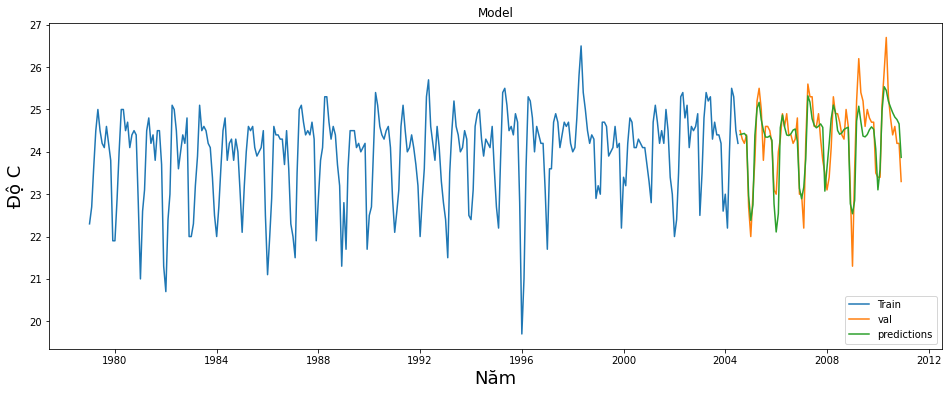

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Tm'])
plt.plot(x_test_vi[['Tm','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[2])

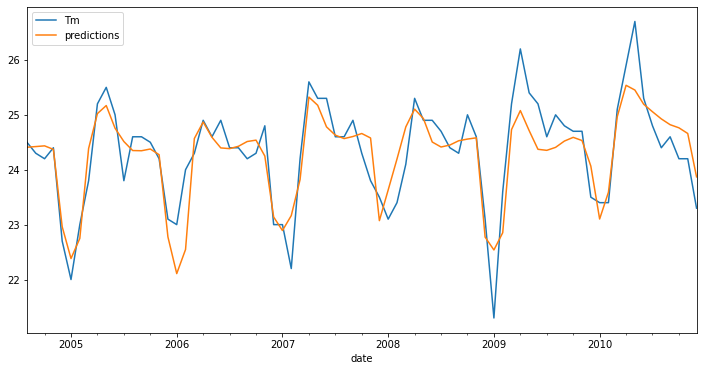

In [ ]:
x_test_vi[['Tm','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Rf predict

In [ ]:
dt_Rf = df_new_8.filter(['Rf'])
train_vi = dt_Rf[:train_data_len]
x_test_vi = dt_Rf[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
x_test_vi

Rf  predictions
date                          
2004-08-01  209.7   236.211319
2004-09-01  250.0   253.469269
2004-10-01  243.5   262.973358
2004-11-01  141.9   179.556274
2004-12-01   10.3    34.554344
...           ...          ...
2010-08-01  204.0   274.339813
2010-09-01  121.0   294.666260
2010-10-01  265.0   312.891693
2010-11-01  204.0   247.124008
2010-12-01   82.0    72.380478

[77 rows x 2 columns]

rmse: 67.53338178414319


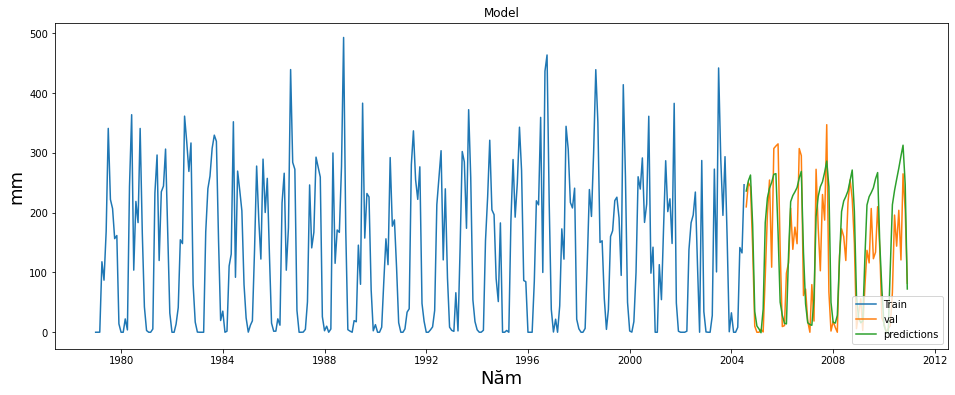

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm", fontsize=18)
plt.plot(train_vi['Rf'])
plt.plot(x_test_vi[['Rf','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[3])

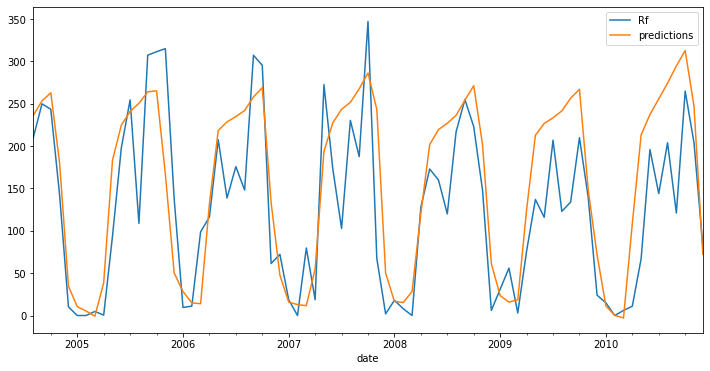

In [ ]:
x_test_vi[['Rf','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot rH predict

In [ ]:
dt_rH = df_new_8.filter(['rH'])
train_vi = dt_rH[:train_data_len]
x_test_vi = dt_rH[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 3.2687604855167676


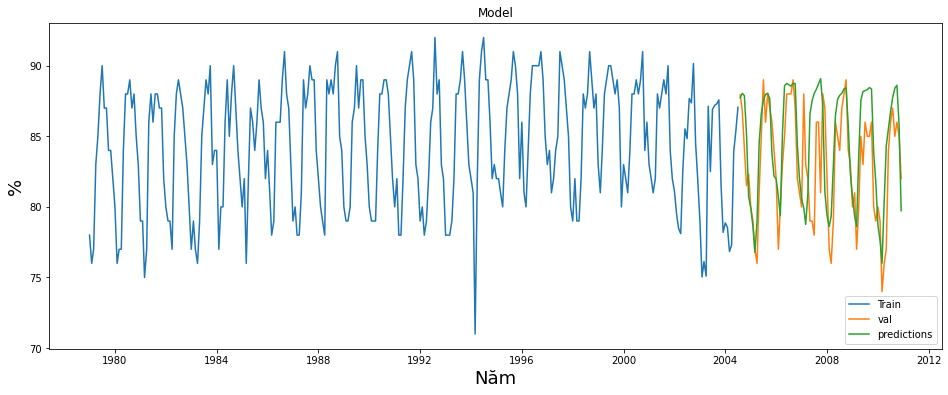

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("%", fontsize=18)
plt.plot(train_vi['rH'])
plt.plot(x_test_vi[['rH','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[4])

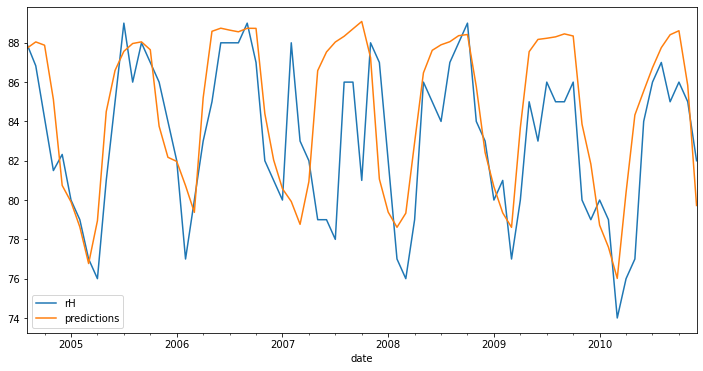

In [ ]:
x_test_vi[['rH','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Sh predict

In [ ]:
dt_Sh = df_new_8.filter(['Sh'])
train_vi = dt_Sh[:train_data_len]
x_test_vi = dt_Sh[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 114.97666349530546


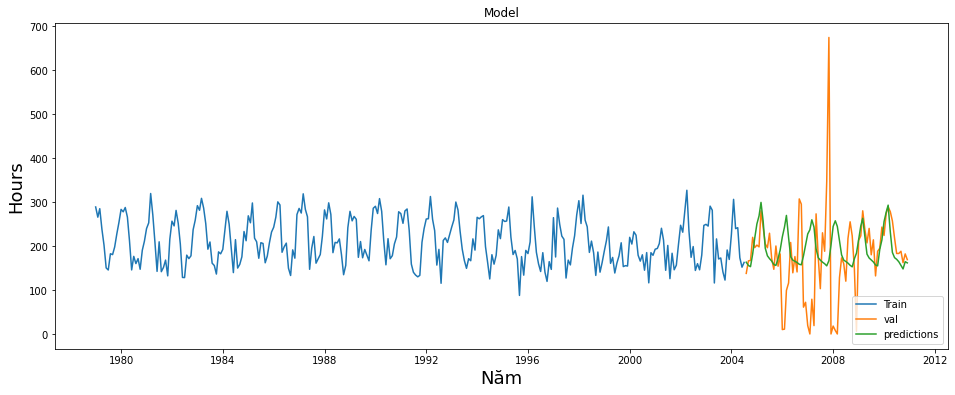

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.plot(train_vi['Sh'])
plt.plot(x_test_vi[['Sh','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[5])

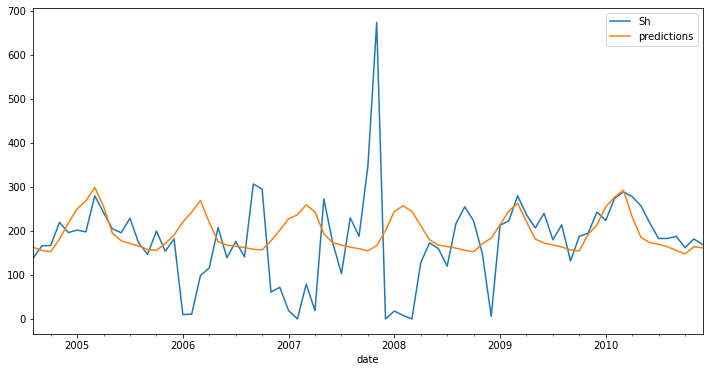

In [ ]:
x_test_vi[['Sh','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot aH predict

In [ ]:
dt_aH = df_new_8.filter(['aH'])
train_vi = dt_aH[:train_data_len]
x_test_vi = dt_aH[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 0.9395616201391798


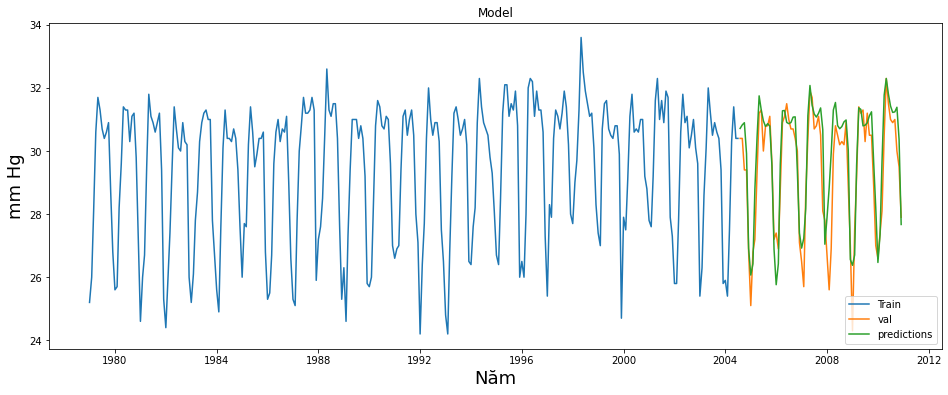

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm Hg", fontsize=18)
plt.plot(train_vi['aH'])
plt.plot(x_test_vi[['aH','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[6])

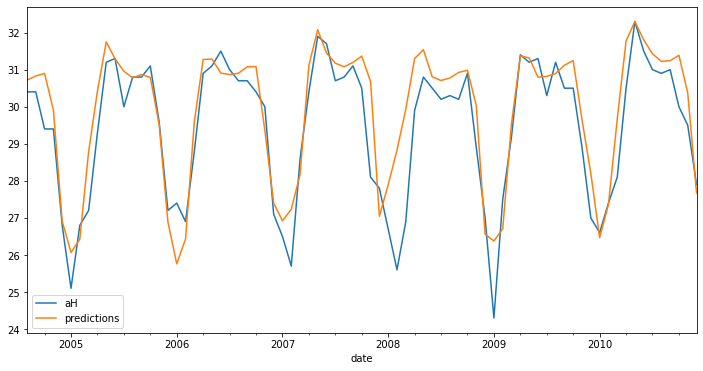

In [ ]:
x_test_vi[['aH','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

# 5.1 Train with all attribute [Sapa]

##overview

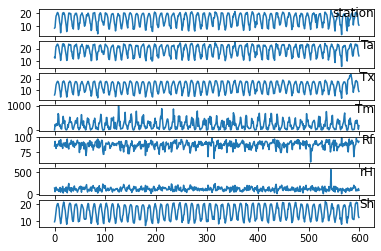

In [ ]:
#get values
df_new_v=df_new_47.values
# plot dữ liệu: với 7 thuộc tính (trừ wnd-dir)
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
pyplot.figure()
# plot each column
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(df_new_v[:, group])
	#thêm comment
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1

pyplot.show()

## % train_data_set

In [ ]:
import numpy as np
train_data_set_47 = df_new_47
train_data_set_47_v=train_data_set_47.values
print(train_data_set_47)
# xác định % của tập dữ liệu dùng để train
train_data_len = int(len(train_data_set_47_v)*.80)
print(train_data_len)

              Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1961-01-01   8.7  13.1   5.6   15.4  85.0  143.1   9.6
1961-02-01   9.2  12.4   7.1  232.4  93.0   60.3  10.7
1961-03-01  14.2  18.4  11.2  181.6  87.0  127.4  13.6
1961-04-01  17.7  22.0  14.5  260.0  81.0  161.6  15.9
1961-05-01  18.5  22.3  16.0  189.1  87.0   96.0  18.5
...          ...   ...   ...    ...   ...    ...   ...
2010-08-01  19.2  22.3  17.3  412.0  94.0   83.0  21.0
2010-09-01  19.4  22.9  17.2  288.0  94.0   93.0  21.0
2010-10-01  16.0  18.9  13.8  195.0  93.0   86.0  17.0
2010-11-01  11.8  15.8  10.0   41.0  91.0  131.0  13.0
2010-12-01  10.9  14.3   8.7  185.0  93.0   93.0  12.2

[600 rows x 7 columns]
480


##scales data

In [ ]:
#scale data
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = RobustScaler()
#scaler = StandardScaler()
scaled = scaler.fit_transform(train_data_set_47_v)
scaled.shape

(600, 7)

In [ ]:
scaled

array([[0.27222222, 0.37948718, 0.13953488, ..., 0.65853659, 0.23907407,
        0.15862069],
       [0.3       , 0.34358974, 0.20930233, ..., 0.85365854, 0.08574074,
        0.23448276],
       [0.57777778, 0.65128205, 0.4       , ..., 0.70731707, 0.21      ,
        0.43448276],
       ...,
       [0.67777778, 0.67692308, 0.52093023, ..., 0.85365854, 0.13333333,
        0.66896552],
       [0.44444444, 0.51794872, 0.34418605, ..., 0.80487805, 0.21666667,
        0.39310345],
       [0.39444444, 0.44102564, 0.28372093, ..., 0.85365854, 0.1462963 ,
        0.33793103]])

##train data

In [ ]:
# train_data = scaled[0:train_data_len, :]
# print(train_data.shape)
# x_train = []
# y_train = []

# # tạo bộ x_train=( samples, 12 time_steps, 7 feature)
# for i in range(12, len(train_data)): #len(train_data) = 480
#   # 12 tháng đầu tiên làm x_train
#   x_train.append(train_data[i-12:i,:])
#   # tháng 13 liền kề làm y_train => tạo 468 bộ như thế.
#   y_train.append(train_data[i,:])
#   if i <=13:
#     print("x_train: ")
#     print(x_train)
#     print("y_train: ")
#     print(y_train)
# #convert into np.array
# x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train.shape)
# # reshape x_train: chuyển thành 3D array
# #x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
# print(x_train.shape)
# print(y_train.shape)

In [ ]:
train_data = scaled[0:train_data_len, :]
print(train_data.shape)
x_train = []
y_train = []

# tạo bộ x_train=( samples, 24 time_steps, 7 feature)
for i in range(24, len(train_data)): #len(train_data) = 480
  # 24 tháng đầu tiên làm x_train
  x_train.append(train_data[i-24:i,:])
  # tháng 25 liền kề làm y_train => tạo 456 bộ như thế.
  y_train.append(train_data[i,:])
  if i <=25:
    print("x_train: ")
    print(x_train)
    print("y_train: ")
    print(y_train)
#convert into np.array
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
# reshape x_train: chuyển thành 3D array
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
print(x_train.shape)
print(y_train.shape)

(480, 7)
x_train: 
[array([[0.27222222, 0.37948718, 0.13953488, 0.01041879, 0.65853659,
        0.23907407, 0.15862069],
       [0.3       , 0.34358974, 0.20930233, 0.23207354, 0.85365854,
        0.08574074, 0.23448276],
       [0.57777778, 0.65128205, 0.4       , 0.18018386, 0.70731707,
        0.21      , 0.43448276],
       [0.77222222, 0.83589744, 0.55348837, 0.26026558, 0.56097561,
        0.27333333, 0.59310345],
       [0.81666667, 0.85128205, 0.62325581, 0.18784474, 0.70731707,
        0.15185185, 0.77241379],
       [0.88888889, 0.91282051, 0.6744186 , 0.27477017, 0.68292683,
        0.19796296, 0.86206897],
       [0.92222222, 0.92820513, 0.70697674, 0.20132789, 0.65853659,
        0.16962963, 0.91034483],
       [0.88333333, 0.89230769, 0.69302326, 0.68478039, 0.75609756,
        0.18166667, 0.91034483],
       [0.81111111, 0.82051282, 0.63255814, 0.64239019, 0.75609756,
        0.10296296, 0.79310345],
       [0.70555556, 0.71282051, 0.55348837, 0.28181818, 0.87804878,
   

In [ ]:
# train_data = scaled[0:train_data_len, :]
# print(train_data.shape)
# x_train = []
# y_train = []

# # tạo bộ x_train=( samples, 36 time_steps, 7 feature)
# for i in range(36, len(train_data)): #len(train_data) = 480
#   # 36 tháng đầu tiên làm x_train
#   x_train.append(train_data[i-36:i,:])
#   # tháng 37 liền kề làm y_train => tạo 444 bộ như thế.
#   y_train.append(train_data[i,:])
#   if i <=37:
#     print("x_train: ")
#     print(x_train)
#     print("y_train: ")
#     print(y_train)
# #convert into np.array
# x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train.shape)
# # reshape x_train: chuyển thành 3D array
# #x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
# print(x_train.shape)
# print(y_train.shape)

## build model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential() #mô hình tuần tự

model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(16, return_sequences = False))
model.add(Dense(7))



model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, batch_size=1, epochs=50)
print(model.summary())

Epoch 1/50
456/456 [==============================] - 13s 18ms/step - loss: 0.0437
Epoch 2/50
456/456 [==============================] - 8s 18ms/step - loss: 0.0127
Epoch 3/50
456/456 [==============================] - 8s 18ms/step - loss: 0.0088
Epoch 4/50
456/456 [==============================] - 8s 18ms/step - loss: 0.0085
Epoch 5/50
456/456 [==============================] - 9s 20ms/step - loss: 0.0085
Epoch 6/50
456/456 [==============================] - 8s 18ms/step - loss: 0.0088
Epoch 7/50
456/456 [==============================] - 8s 18ms/step - loss: 0.0085
Epoch 8/50
456/456 [==============================] - 8s 19ms/step - loss: 0.0079
Epoch 9/50
456/456 [==============================] - 8s 18ms/step - loss: 0.0080
Epoch 10/50
456/456 [==============================] - 8s 19ms/step - loss: 0.0080
Epoch 11/50
456/456 [==============================] - 8s 18ms/step - loss: 0.0082
Epoch 12/50
456/456 [==============================] - 9s 19ms/step - loss: 0.0080
Epoch 13/50


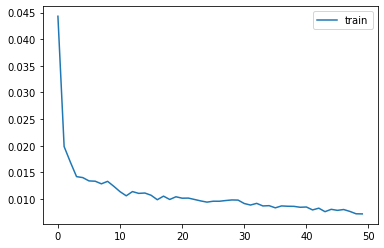

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

##test_data and predict

In [ ]:
# # phải - 12 vì sẽ phải dự đó cho 13 trở về sau.
# test_data = scaled[train_data_len - 12: , :]
# x_test = []
# # chú ý y_test phải là giá trị chưa scale
# y_test = train_data_set_47_v[train_data_len: , :]
# for i in range(12, len(test_data)):
#   x_test.append(test_data[i-12:i, :])
#   if i<=13:
#     print(x_test)
# x_test = np.array(x_test)
# #x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
# print(x_test.shape)

In [ ]:
# phải - 24 vì sẽ phải dự đó cho 25 trở về sau.
test_data = scaled[train_data_len - 24: , :]
x_test = []
# chú ý y_test phải là giá trị chưa scale
y_test = train_data_set_47_v[train_data_len: , :]
for i in range(24, len(test_data)):
  x_test.append(test_data[i-24:i, :])
  if i<=25:
    print(x_test)
x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
print(x_test.shape)

[array([[0.33333333, 0.41538462, 0.2       , 0.06567926, 0.73170732,
        0.22240741, 0.22068966],
       [0.41666667, 0.49230769, 0.28837209, 0.01276813, 0.73170732,
        0.13907407, 0.28965517],
       [0.65555556, 0.75897436, 0.42790698, 0.03268641, 0.3902439 ,
        0.32407407, 0.33793103],
       [0.72777778, 0.74871795, 0.55813953, 0.30663943, 0.7804878 ,
        0.17814815, 0.67586207],
       [0.72222222, 0.71282051, 0.57209302, 0.35771195, 0.75609756,
        0.13018519, 0.67586207],
       [0.90555556, 0.8974359 , 0.71627907, 0.32921348, 0.73170732,
        0.19333333, 0.91724138],
       [0.91111111, 0.91282051, 0.71627907, 0.53656793, 0.75609756,
        0.17981481, 0.93793103],
       [0.86111111, 0.87692308, 0.68837209, 0.42083759, 0.82926829,
        0.14111111, 0.91724138],
       [0.80555556, 0.85641026, 0.62325581, 0.15199183, 0.82926829,
        0.18740741, 0.83448276],
       [0.68333333, 0.70769231, 0.53953488, 0.22145046, 0.87804878,
        0.13611111, 0.

In [ ]:
# # phải - 36 vì sẽ phải dự đó cho 37 trở về sau.
# test_data = scaled[train_data_len - 36: , :]
# x_test = []
# # chú ý y_test phải là giá trị chưa scale
# y_test = train_data_set_47_v[train_data_len: , :]
# for i in range(36, len(test_data)):
#   x_test.append(test_data[i-36:i, :])
#   if i<=37:
#     print(x_test)
# x_test = np.array(x_test)
# #x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
# print(x_test.shape)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[  9.163872 ,  12.965436 ,   6.889528 ,  74.15743  ,  88.1022   ,
        112.884224 ,  10.247523 ],
       [ 10.70124  ,  14.2566395,   7.854125 ,  85.48399  ,  84.849236 ,
        108.576996 ,  10.4410715],
       [ 14.22822  ,  18.33971  ,  11.125305 , 108.52291  ,  81.13335  ,
        156.60187  ,  12.718334 ],
       [ 17.027187 ,  21.007998 ,  14.113938 , 226.06296  ,  82.97295  ,
        158.38716  ,  15.917229 ],
       [ 18.524395 ,  22.049646 ,  16.181726 , 344.5701   ,  85.94247  ,
        128.49805  ,  18.395346 ],
       [ 19.457699 ,  22.574898 ,  17.250965 , 416.77615  ,  88.61853  ,
         91.66442  ,  19.997068 ],
       [ 19.815063 ,  22.94976  ,  17.64298  , 484.38327  ,  90.08646  ,
         93.74611  ,  20.588598 ],
       [ 19.44218  ,  22.863976 ,  17.348637 , 465.33636  ,  90.11727  ,
        106.802704 ,  20.281279 ],
       [ 18.08777  ,  21.509737 ,  15.8526945, 314.31354  ,  91.04069  ,
         91.49251  ,  18.853552 ],
       [ 15.623427 ,  18.925

##rmse

In [ ]:
df_new_47.head()

Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1961-01-01   8.7  13.1   5.6   15.4  85.0  143.1   9.6
1961-02-01   9.2  12.4   7.1  232.4  93.0   60.3  10.7
1961-03-01  14.2  18.4  11.2  181.6  87.0  127.4  13.6
1961-04-01  17.7  22.0  14.5  260.0  81.0  161.6  15.9
1961-05-01  18.5  22.3  16.0  189.1  87.0   96.0  18.5

In [ ]:
#rmse
rmse_list=[]
for i in range(y_test.shape[1]):
  rmse = np.sqrt(np.mean(((predictions[:,i]-y_test[:,i])**2)))
  rmse_list.append(rmse)
  print("rmse of ",i," is: ",rmse)

rmse of  0  is:  2.1327712226775692
rmse of  1  is:  1.590471665401553
rmse of  2  is:  2.268391667483213
rmse of  3  is:  107.71739067481766
rmse of  4  is:  5.497920403824476
rmse of  5  is:  51.49426125516092
rmse of  6  is:  1.0547134626085792


In [ ]:
#mae
mae_list=[]
for i in range(y_test.shape[1]):
  mae = np.mean(abs(y_test[:,i]-predictions[:,i]))
  mae_list.append(mae)
  print("mae of ",i," is: ",mae)

mae of  0  is:  1.341699981689453
mae of  1  is:  1.1115931590398154
mae of  2  is:  1.3808624807993573
mae of  3  is:  81.55222116470337
mae of  4  is:  3.9227962493896484
mae of  5  is:  30.92209696451823
mae of  6  is:  0.8363718398412069


#5.2 Biểu đồ predict vs y_test [Sapa]

###plot Ta predict

In [ ]:
dt_ta = df_new_47.filter(['Ta'])
train_vi = dt_ta[:train_data_len]
x_test_vi = dt_ta[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 2.1327712226775692


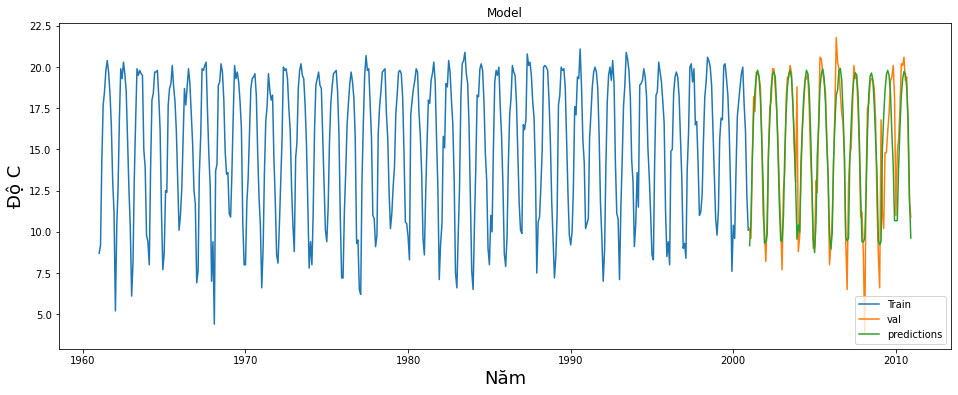

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Ta'])
plt.plot(x_test_vi[['Ta','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[0])

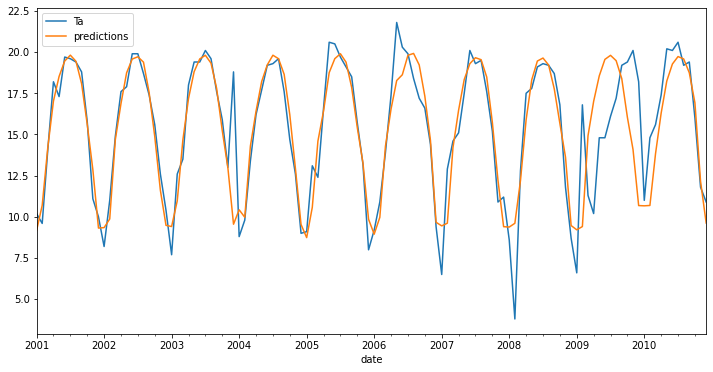

In [ ]:
x_test_vi[['Ta','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Tx predict

In [ ]:
dt_Tx = df_new_47.filter(['Tx'])
train_vi = dt_Tx[:train_data_len]
x_test_vi = dt_Tx[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 1.590471665401553


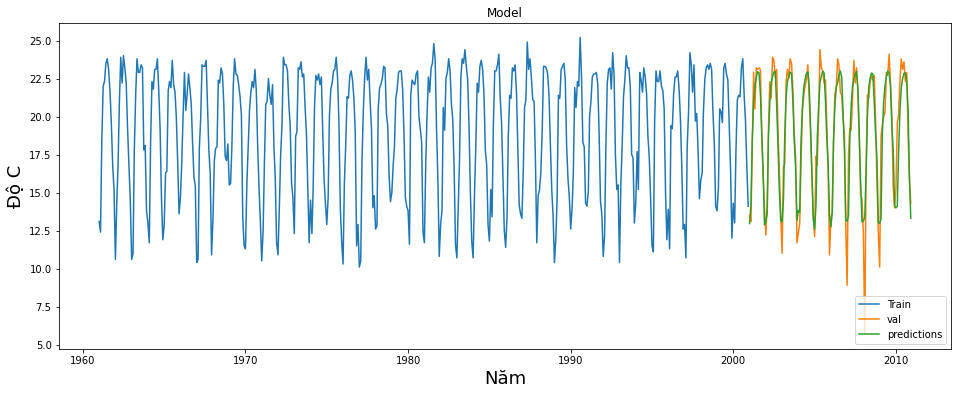

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Tx'])
plt.plot(x_test_vi[['Tx','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[1])

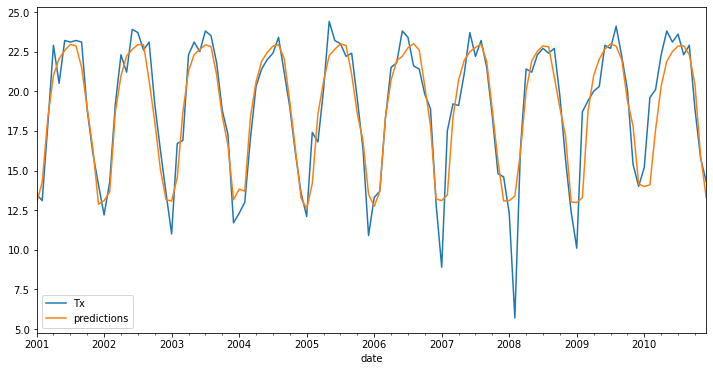

In [ ]:
x_test_vi[['Tx','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Tm predict

In [ ]:
dt_Tm = df_new_47.filter(['Tm'])
train_vi = dt_Tm[:train_data_len]
x_test_vi = dt_Tm[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 2.268391667483213


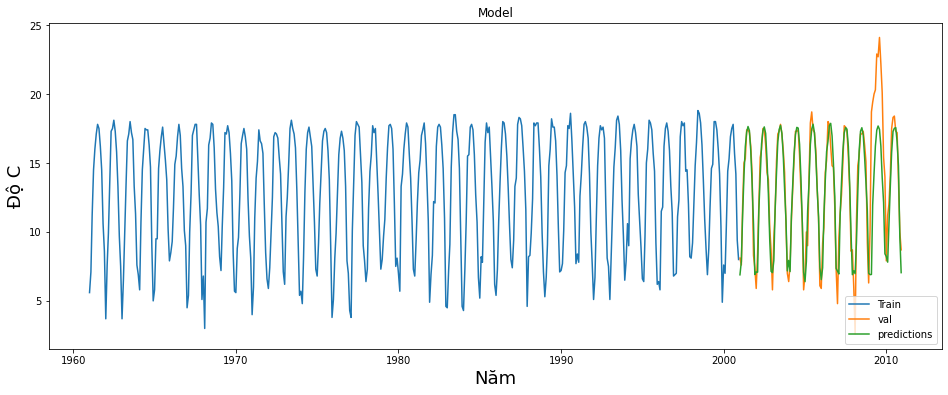

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Tm'])
plt.plot(x_test_vi[['Tm','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[2])

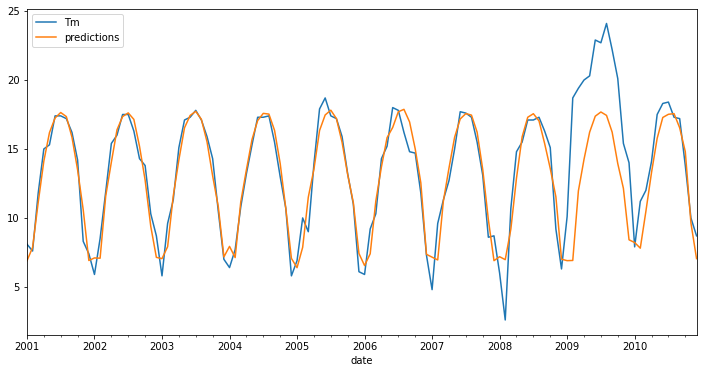

In [ ]:
x_test_vi[['Tm','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Rf predict

In [ ]:
dt_Rf = df_new_47.filter(['Rf'])
train_vi = dt_Rf[:train_data_len]
x_test_vi = dt_Rf[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 107.71739067481766


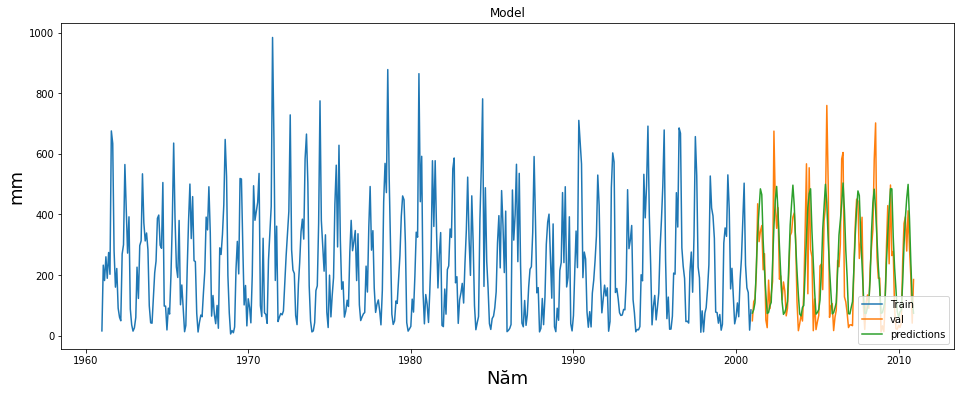

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm", fontsize=18)
plt.plot(train_vi['Rf'])
plt.plot(x_test_vi[['Rf','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[3])

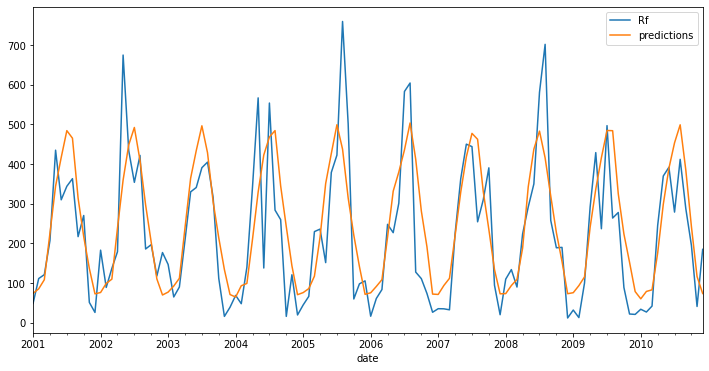

In [ ]:
x_test_vi[['Rf','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot rH predict

In [ ]:
dt_rH = df_new_47.filter(['rH'])
train_vi = dt_rH[:train_data_len]
x_test_vi = dt_rH[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 5.497920403824476


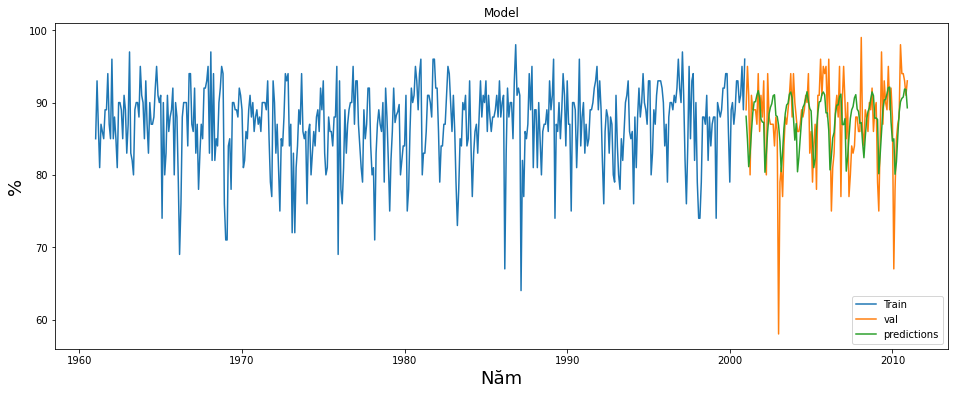

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("%", fontsize=18)
plt.plot(train_vi['rH'])
plt.plot(x_test_vi[['rH','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[4])

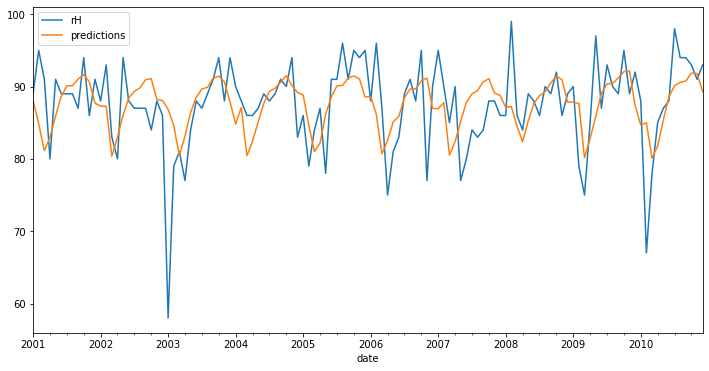

In [ ]:
x_test_vi[['rH','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Sh predict

In [ ]:
dt_Sh = df_new_47.filter(['Sh'])
train_vi = dt_Sh[:train_data_len]
x_test_vi = dt_Sh[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 51.49426125516092


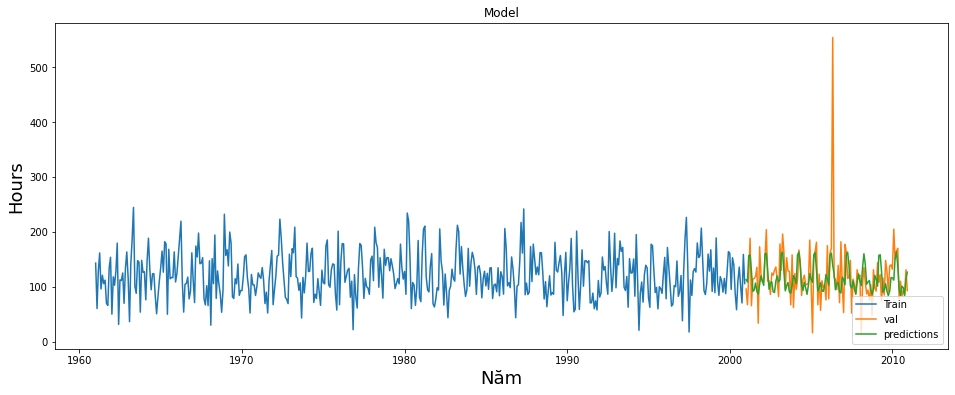

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.plot(train_vi['Sh'])
plt.plot(x_test_vi[['Sh','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[5])

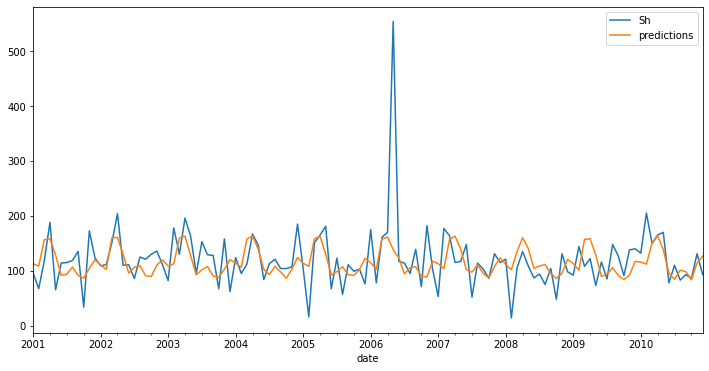

In [ ]:
x_test_vi[['Sh','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot aH predict

In [ ]:
dt_aH = df_new_47.filter(['aH'])
train_vi = dt_aH[:train_data_len]
x_test_vi = dt_aH[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 1.0547134626085792


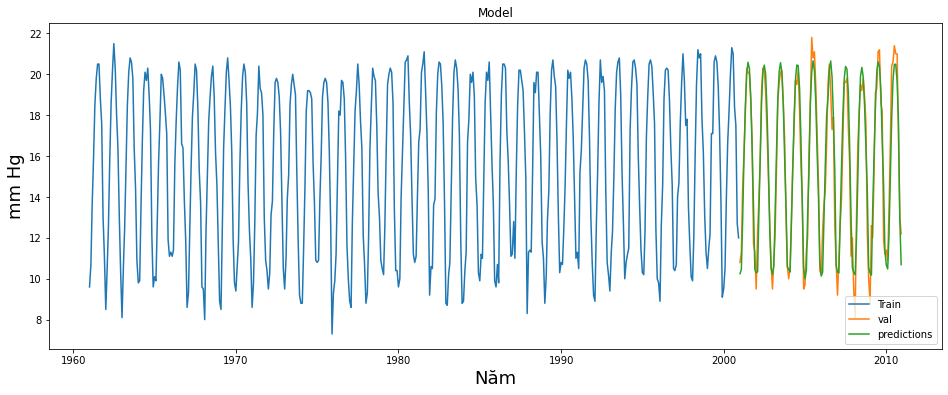

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm Hg", fontsize=18)
plt.plot(train_vi['aH'])
plt.plot(x_test_vi[['aH','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[6])

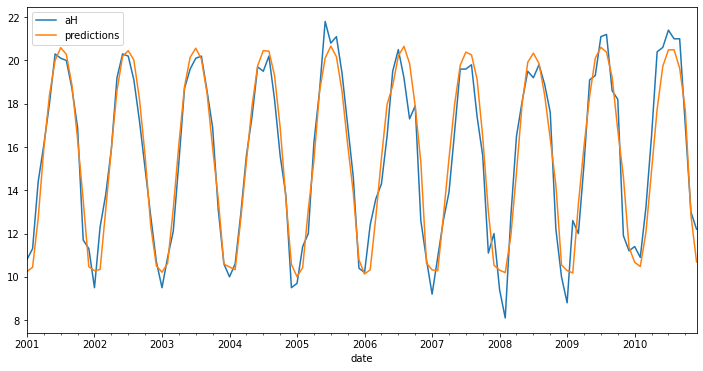

In [ ]:
x_test_vi[['aH','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

# 6.1 Train with all attribute [Danang]

##overview

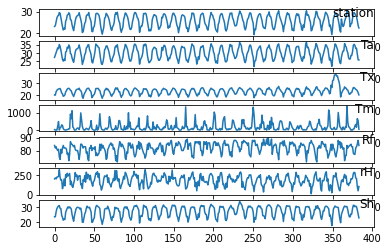

In [ ]:
#get values
df_new_v=df_new_14.values
# plot dữ liệu: với 7 thuộc tính (trừ wnd-dir)
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
pyplot.figure()
# plot each column
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(df_new_v[:, group])
	#thêm comment
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1

pyplot.show()

## % train_data_set

In [ ]:
import numpy as np
train_data_set_14 = df_new_14
train_data_set_14_v=train_data_set_14.values
print(train_data_set_14)
# xác định % của tập dữ liệu dùng để train
train_data_len = int(len(train_data_set_14_v)*.80)
print(train_data_len)

              Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1979-01-01  23.2  27.4  20.1   28.2  84.0  200.3  23.7
1979-02-01  23.6  28.8  20.0    3.9  82.0  211.8  23.8
1979-03-01  25.5  30.2  23.0    1.8  83.0  200.2  27.1
1979-04-01  27.2  31.7  24.1   13.2  81.0  223.7  29.3
1979-05-01  28.1  33.1  24.8  215.5  80.0  225.8  30.2
...          ...   ...   ...    ...   ...    ...   ...
2010-08-01  28.1  32.7  24.9  326.0  82.0  212.0  30.8
2010-09-01  27.7  32.8  24.5  166.0  83.0  203.0  30.4
2010-10-01  25.9  29.2  23.6  656.0  85.0  102.0  28.3
2010-11-01  23.7  26.0  22.1  546.0  88.0   49.0  25.6
2010-12-01  22.5  25.9  20.2   52.0  84.0  104.0  23.0

[384 rows x 7 columns]
307


##scales data

In [ ]:
#scale data
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = RobustScaler()
#scaler = StandardScaler()
scaled = scaler.fit_transform(train_data_set_14_v)
scaled.shape

(384, 7)

In [ ]:
scaled

array([[0.33928571, 0.37762238, 0.1372549 , ..., 0.68421053, 0.61795544,
        0.3625    ],
       [0.375     , 0.47552448, 0.13235294, ..., 0.57894737, 0.65563565,
        0.36875   ],
       [0.54464286, 0.57342657, 0.27941176, ..., 0.63157895, 0.61762779,
        0.575     ],
       ...,
       [0.58035714, 0.5034965 , 0.30882353, ..., 0.73684211, 0.29587156,
        0.65      ],
       [0.38392857, 0.27972028, 0.23529412, ..., 0.89473684, 0.12221494,
        0.48125   ],
       [0.27678571, 0.27272727, 0.14215686, ..., 0.68421053, 0.30242464,
        0.31875   ]])

##train data

In [ ]:
# train_data = scaled[0:train_data_len, :]
# print(train_data.shape)
# x_train = []
# y_train = []

# # tạo bộ x_train=( samples, 12 time_steps, 7 feature)
# for i in range(12, len(train_data)): #len(train_data) = 307
#   # 12 tháng đầu tiên làm x_train
#   x_train.append(train_data[i-12:i,:])
#   # tháng 13 liền kề làm y_train => tạo 295 bộ như thế.
#   y_train.append(train_data[i,:])
#   if i <=13:
#     print("x_train: ")
#     print(x_train)
#     print("y_train: ")
#     print(y_train)
# #convert into np.array
# x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train.shape)
# # reshape x_train: chuyển thành 3D array
# #x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
# print(x_train.shape)
# print(y_train.shape)

In [ ]:
train_data = scaled[0:train_data_len, :]
print(train_data.shape)
x_train = []
y_train = []

# tạo bộ x_train=( samples, 24 time_steps, 7 feature)
for i in range(24, len(train_data)): #len(train_data) = 307
  # 24 tháng đầu tiên làm x_train
  x_train.append(train_data[i-24:i,:])
  # tháng 25 liền kề làm y_train => tạo 283 bộ như thế.
  y_train.append(train_data[i,:])
  if i <=25:
    print("x_train: ")
    print(x_train)
    print("y_train: ")
    print(y_train)
#convert into np.array
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
# reshape x_train: chuyển thành 3D array
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
print(x_train.shape)
print(y_train.shape)

(307, 7)
x_train: 
[array([[0.33928571, 0.37762238, 0.1372549 , 0.02049419, 0.68421053,
        0.61795544, 0.3625    ],
       [0.375     , 0.47552448, 0.13235294, 0.0028343 , 0.57894737,
        0.65563565, 0.36875   ],
       [0.54464286, 0.57342657, 0.27941176, 0.00130814, 0.63157895,
        0.61762779, 0.575     ],
       [0.69642857, 0.67832168, 0.33333333, 0.00959302, 0.52631579,
        0.69462647, 0.7125    ],
       [0.77678571, 0.77622378, 0.36764706, 0.15661337, 0.47368421,
        0.70150721, 0.76875   ],
       [0.79464286, 0.73426573, 0.3872549 , 0.35508721, 0.52631579,
        0.72116645, 0.81875   ],
       [0.91964286, 0.90909091, 0.39705882, 0.00472384, 0.21052632,
        1.        , 0.83125   ],
       [0.88392857, 0.83916084, 0.40686275, 0.09527616, 0.10526316,
        0.67201835, 0.7125    ],
       [0.69642857, 0.67132867, 0.32843137, 0.12078488, 0.52631579,
        0.56487549, 0.7       ],
       [0.5       , 0.46853147, 0.22058824, 0.2184593 , 0.36842105,
   

In [ ]:
# train_data = scaled[0:train_data_len, :]
# print(train_data.shape)
# x_train = []
# y_train = []

# # tạo bộ x_train=( samples, 36 time_steps, 7 feature)
# for i in range(36, len(train_data)): #len(train_data) = 307
#   # 36 tháng đầu tiên làm x_train
#   x_train.append(train_data[i-36:i,:])
#   # tháng 37 liền kề làm y_train => tạo 271 bộ như thế.
#   y_train.append(train_data[i,:])
#   if i <=37:
#     print("x_train: ")
#     print(x_train)
#     print("y_train: ")
#     print(y_train)
# #convert into np.array
# x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train.shape)
# # reshape x_train: chuyển thành 3D array
# #x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 7))
# print(x_train.shape)
# print(y_train.shape)

(307, 7)
x_train: 
[array([[2.28070175e-01, 2.98507463e-01, 3.71428571e-01, 0.00000000e+00,
        3.33333333e-01, 4.28338279e-01, 1.06382979e-01],
       [3.68421053e-01, 4.77611940e-01, 4.28571429e-01, 0.00000000e+00,
        2.38095238e-01, 3.93916914e-01, 1.91489362e-01],
       [5.78947368e-01, 7.01492537e-01, 5.57142857e-01, 2.02798621e-04,
        2.85714286e-01, 4.22551929e-01, 4.14893617e-01],
       [6.31578947e-01, 7.01492537e-01, 6.85714286e-01, 2.39099574e-01,
        5.71428571e-01, 3.53115727e-01, 6.80851064e-01],
       [6.66666667e-01, 6.41791045e-01, 7.57142857e-01, 1.76637599e-01,
        6.66666667e-01, 2.99703264e-01, 7.97872340e-01],
       [5.26315789e-01, 4.77611940e-01, 6.85714286e-01, 3.42526871e-01,
        8.09523810e-01, 2.22700297e-01, 7.55319149e-01],
       [3.50877193e-01, 2.68656716e-01, 6.42857143e-01, 6.91543298e-01,
        9.04761905e-01, 2.15875371e-01, 6.91489362e-01],
       [4.03508772e-01, 3.13432836e-01, 6.28571429e-01, 4.50415737e-01,
     

## build model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential() #mô hình tuần tự

model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(16, return_sequences = False))
model.add(Dense(7))



model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, batch_size=1, epochs=50)
print(model.summary())

Epoch 1/50
283/283 [==============================] - 10s 19ms/step - loss: 0.0489
Epoch 2/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0254
Epoch 3/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0125
Epoch 4/50
283/283 [==============================] - 5s 18ms/step - loss: 0.0105
Epoch 5/50
283/283 [==============================] - 5s 18ms/step - loss: 0.0107
Epoch 6/50
283/283 [==============================] - 6s 21ms/step - loss: 0.0108
Epoch 7/50
283/283 [==============================] - 6s 22ms/step - loss: 0.0104
Epoch 8/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0104
Epoch 9/50
283/283 [==============================] - 5s 18ms/step - loss: 0.0106
Epoch 10/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0101
Epoch 11/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0100
Epoch 12/50
283/283 [==============================] - 5s 19ms/step - loss: 0.0102
Epoch 13/50


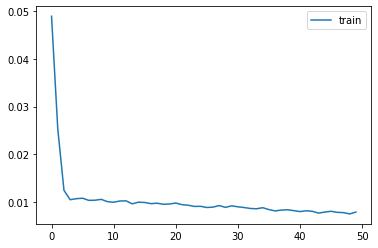

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

##test_data and predict

In [ ]:
# # phải - 12 vì sẽ phải dự đó cho 13 trở về sau.
# test_data = scaled[train_data_len - 12: , :]
# x_test = []
# # chú ý y_test phải là giá trị chưa scale
# y_test = train_data_set_14_v[train_data_len: , :]
# for i in range(12, len(test_data)):
#   x_test.append(test_data[i-12:i, :])
#   if i<=13:
#     print(x_test)
# x_test = np.array(x_test)
# #x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
# print(x_test.shape)

In [ ]:
# phải - 24 vì sẽ phải dự đó cho 25 trở về sau.
test_data = scaled[train_data_len - 24: , :]
x_test = []
# chú ý y_test phải là giá trị chưa scale
y_test = train_data_set_14_v[train_data_len: , :]
for i in range(24, len(test_data)):
  x_test.append(test_data[i-24:i, :])
  if i<=25:
    print(x_test)
x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
print(x_test.shape)

[array([[0.78571429, 0.75524476, 0.3872549 , 0.27311047, 0.56052632,
        0.53407602, 0.79375   ],
       [0.67857143, 0.62237762, 0.35294118, 0.38292151, 0.79315789,
        0.35747051, 0.775     ],
       [0.58928571, 0.54545455, 0.29901961, 0.38328488, 0.77105263,
        0.53407602, 0.675     ],
       [0.47321429, 0.40559441, 0.26470588, 0.34171512, 0.75789474,
        0.29456094, 0.5375    ],
       [0.36607143, 0.32867133, 0.21078431, 0.15421512, 0.85578947,
        0.2948886 , 0.46875   ],
       [0.125     , 0.1958042 , 0.05392157, 0.01598837, 0.66736842,
        0.3404325 , 0.16875   ],
       [0.375     , 0.36363636, 0.20588235, 0.01468023, 0.88526316,
        0.49311927, 0.475     ],
       [0.45535714, 0.48251748, 0.23529412, 0.02732558, 0.68263158,
        0.53047182, 0.4875    ],
       [0.67857143, 0.67832168, 0.33823529, 0.01293605, 0.66842105,
        0.71494102, 0.71875   ],
       [0.8125    , 0.8041958 , 0.39705882, 0.08015988, 0.52947368,
        0.80242464, 0.

In [ ]:
# # phải - 36 vì sẽ phải dự đó cho 37 trở về sau.
# test_data = scaled[train_data_len - 36: , :]
# x_test = []
# # chú ý y_test phải là giá trị chưa scale
# y_test = train_data_set_14_v[train_data_len: , :]
# for i in range(36, len(test_data)):
#   x_test.append(test_data[i-36:i, :])
#   if i<=37:
#     print(x_test)
# x_test = np.array(x_test)
# #x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],7))
# print(x_test.shape)

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 28.622845,  33.40069 ,  25.17721 , 176.56174 ,  79.14049 ,
        215.90952 ,  30.442656],
       [ 26.810534,  30.831903,  23.810354, 434.64395 ,  84.097176,
        161.14989 ,  29.17542 ],
       [ 25.460777,  28.869596,  23.005108, 705.3063  ,  85.97287 ,
        144.51837 ,  27.71147 ],
       [ 23.894827,  26.931479,  21.620516, 489.74472 ,  84.85686 ,
        115.662315,  25.234058],
       [ 21.775553,  24.872648,  19.893217, 273.42297 ,  85.72996 ,
         88.49825 ,  22.498213],
       [ 21.440142,  24.966978,  19.162989,  85.675934,  84.39657 ,
        127.013794,  21.707058],
       [ 22.004305,  25.865507,  19.692795,  42.79861 ,  84.08528 ,
        148.9571  ,  22.520813],
       [ 24.175913,  28.6269  ,  21.585732,  39.492584,  83.99171 ,
        188.10037 ,  25.519903],
       [ 26.428427,  31.24822 ,  23.498663,  69.67189 ,  83.01557 ,
        221.6656  ,  28.554396],
       [ 28.295359,  33.403522,  24.871807, 112.4544  ,  80.473625,
        242.35799 ,  30

##rmse

In [ ]:
df_new_14.head()

Ta    Tx    Tm     Rf    rH     Sh    aH
date                                                  
1979-01-01  23.2  27.4  20.1   28.2  84.0  200.3  23.7
1979-02-01  23.6  28.8  20.0    3.9  82.0  211.8  23.8
1979-03-01  25.5  30.2  23.0    1.8  83.0  200.2  27.1
1979-04-01  27.2  31.7  24.1   13.2  81.0  223.7  29.3
1979-05-01  28.1  33.1  24.8  215.5  80.0  225.8  30.2

In [ ]:
#rmse
rmse_list=[]
for i in range(y_test.shape[1]):
  rmse = np.sqrt(np.mean(((predictions[:,i]-y_test[:,i])**2)))
  rmse_list.append(rmse)
  print("rmse of ",i," is: ",rmse)

rmse of  0  is:  1.6495030021813497
rmse of  1  is:  1.2061724687066815
rmse of  2  is:  4.287177251193953
rmse of  3  is:  195.5404338795344
rmse of  4  is:  3.1198568951997365
rmse of  5  is:  40.6630364727855
rmse of  6  is:  1.3994597899780283


In [ ]:
#mae
mae_list=[]
for i in range(y_test.shape[1]):
  mae = np.mean(abs(y_test[:,i]-predictions[:,i]))
  mae_list.append(mae)
  print("mae of ",i," is: ",mae)

mae of  0  is:  1.0976337482402851
mae of  1  is:  0.9550602355560694
mae of  2  is:  2.3256918969092433
mae of  3  is:  111.50807363336736
mae of  4  is:  2.3240452833299514
mae of  5  is:  32.2770713112571
mae of  6  is:  1.062551795662224


#6.2 Biểu đồ predict vs y_test [Danang]

###plot Ta predict

In [ ]:
dt_ta = df_new_14.filter(['Ta'])
train_vi = dt_ta[:train_data_len]
x_test_vi = dt_ta[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 1.6495030021813497


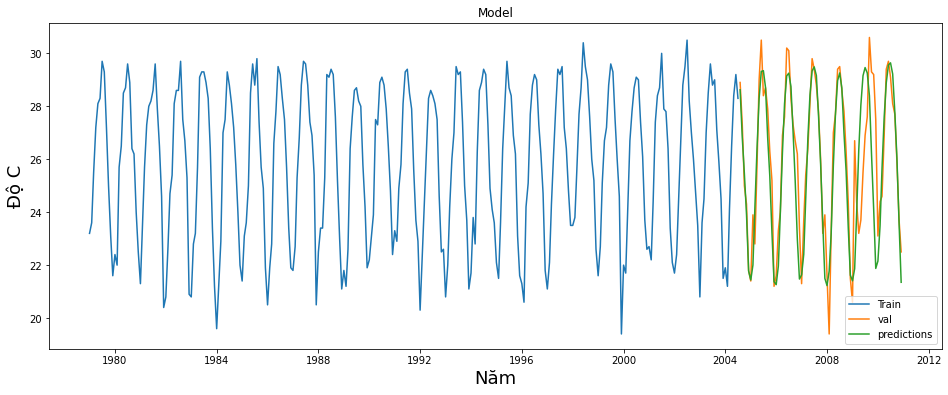

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Ta'])
plt.plot(x_test_vi[['Ta','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[0])

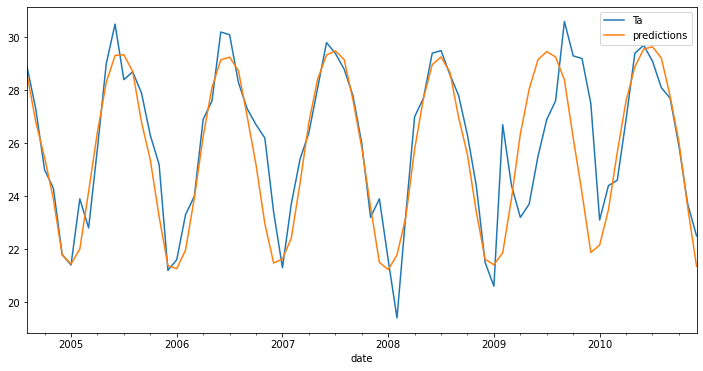

In [ ]:
x_test_vi[['Ta','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Tx predict

In [ ]:
dt_Tx = df_new_14.filter(['Tx'])
train_vi = dt_Tx[:train_data_len]
x_test_vi = dt_Tx[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 1.2061724687066815


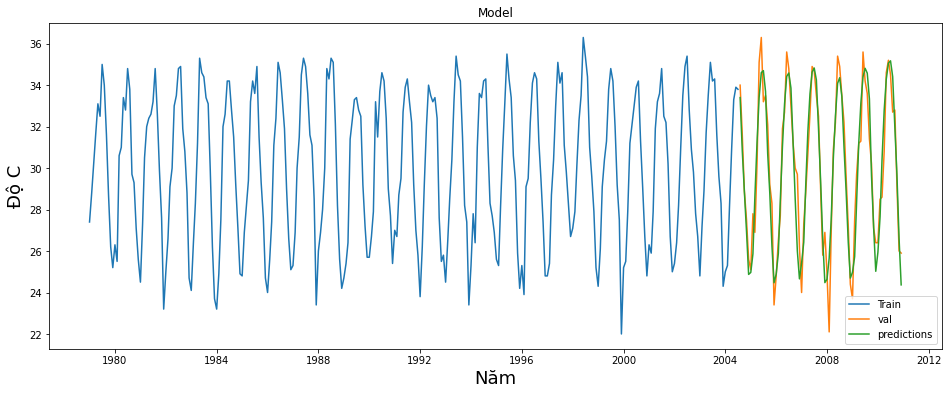

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Tx'])
plt.plot(x_test_vi[['Tx','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[1])

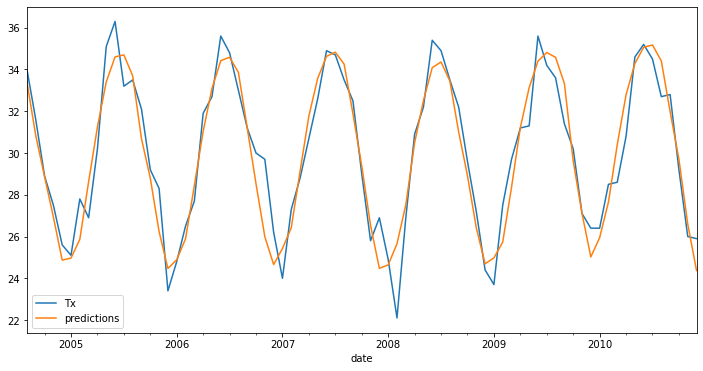

In [ ]:
x_test_vi[['Tx','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Tm predict

In [ ]:
dt_Tm = df_new_14.filter(['Tm'])
train_vi = dt_Tm[:train_data_len]
x_test_vi = dt_Tm[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 4.287177251193953


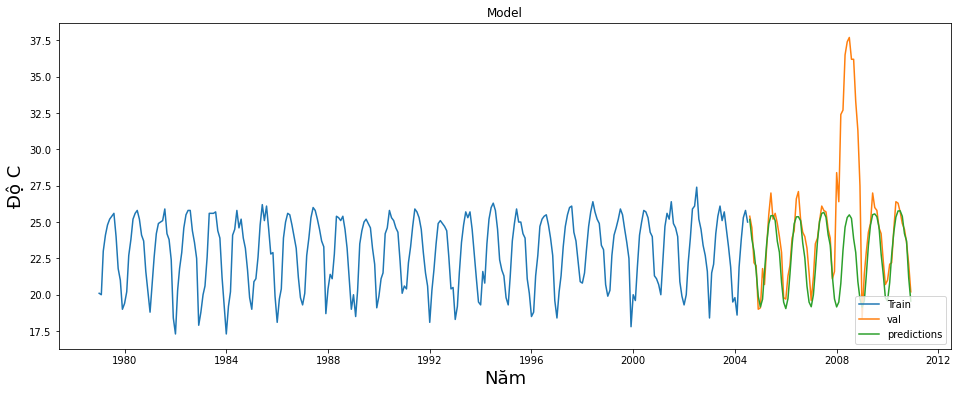

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Độ C", fontsize=18)
plt.plot(train_vi['Tm'])
plt.plot(x_test_vi[['Tm','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[2])

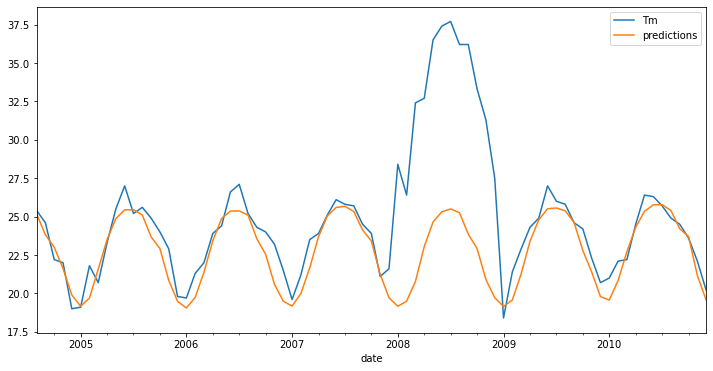

In [ ]:
x_test_vi[['Tm','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Rf predict

In [ ]:
dt_Rf = df_new_14.filter(['Rf'])
train_vi = dt_Rf[:train_data_len]
x_test_vi = dt_Rf[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 195.5404338795344


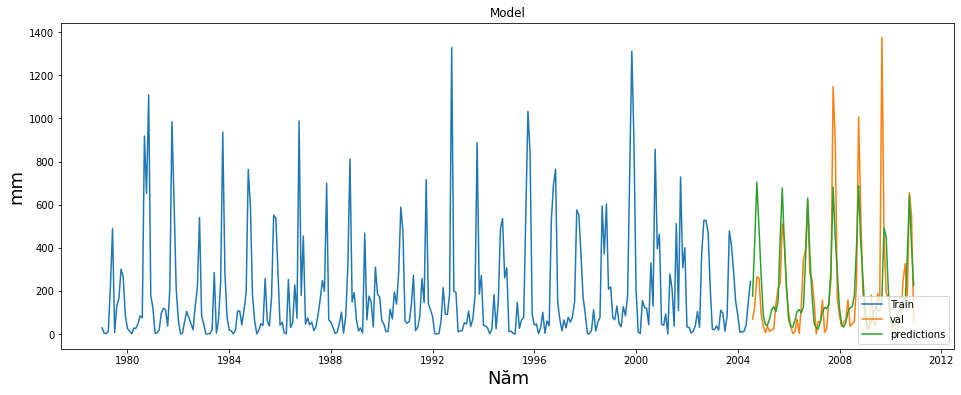

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm", fontsize=18)
plt.plot(train_vi['Rf'])
plt.plot(x_test_vi[['Rf','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[3])

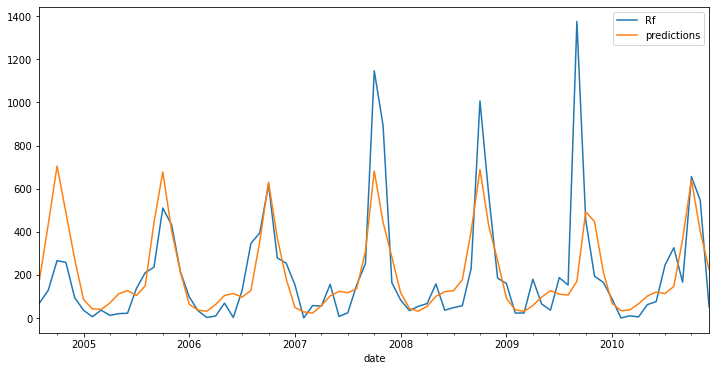

In [ ]:
x_test_vi[['Rf','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot rH predict

In [ ]:
dt_rH = df_new_14.filter(['rH'])
train_vi = dt_rH[:train_data_len]
x_test_vi = dt_rH[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 3.1198568951997365


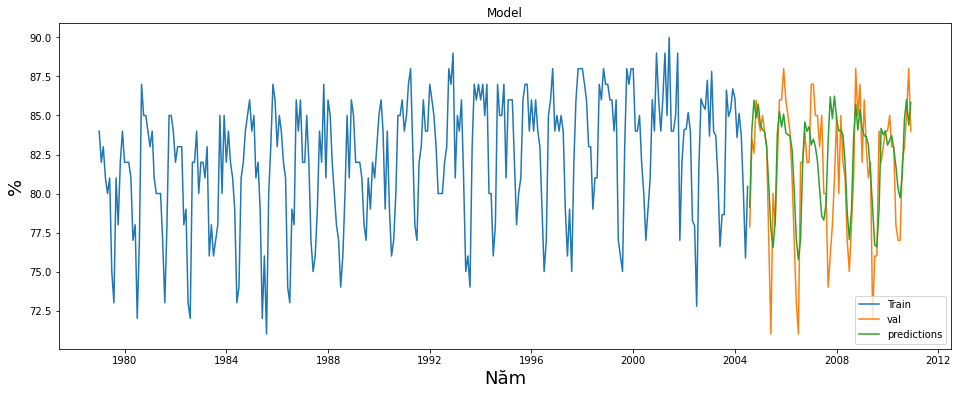

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("%", fontsize=18)
plt.plot(train_vi['rH'])
plt.plot(x_test_vi[['rH','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[4])

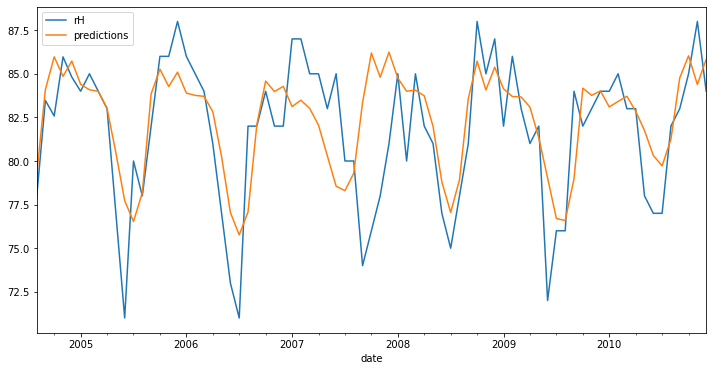

In [ ]:
x_test_vi[['rH','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot Sh predict

In [ ]:
dt_Sh = df_new_14.filter(['Sh'])
train_vi = dt_Sh[:train_data_len]
x_test_vi = dt_Sh[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 40.6630364727855


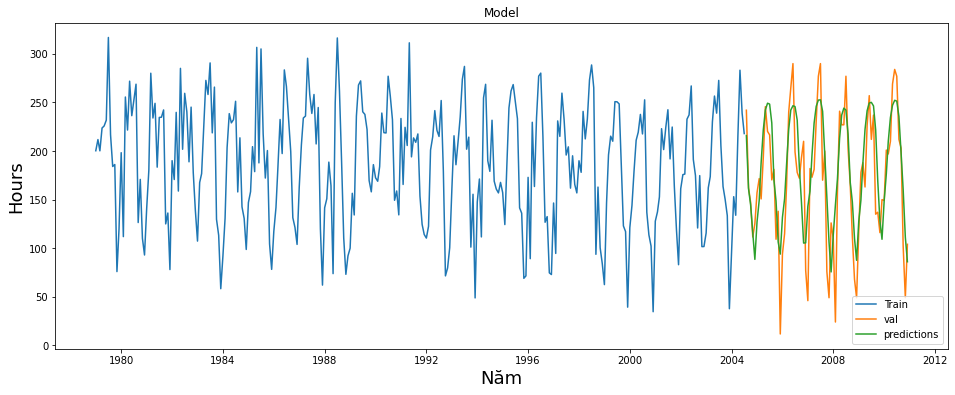

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.plot(train_vi['Sh'])
plt.plot(x_test_vi[['Sh','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[5])

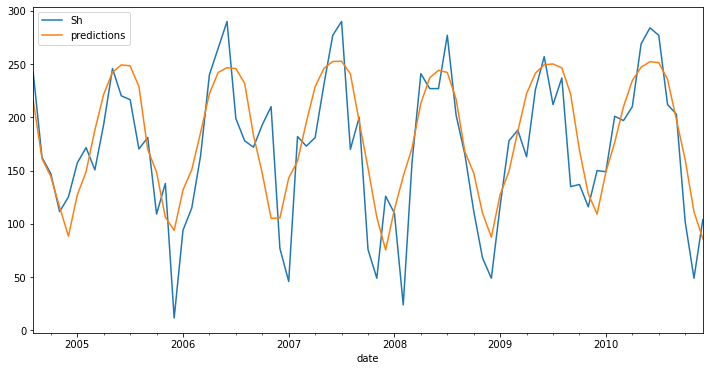

In [ ]:
x_test_vi[['Sh','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)

### plot aH predict

In [ ]:
dt_aH = df_new_14.filter(['aH'])
train_vi = dt_aH[:train_data_len]
x_test_vi = dt_aH[train_data_len:]
# thêm cột predictions
x_test_vi['predictions'] = predictions[:,6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


rmse: 1.3994597899780283


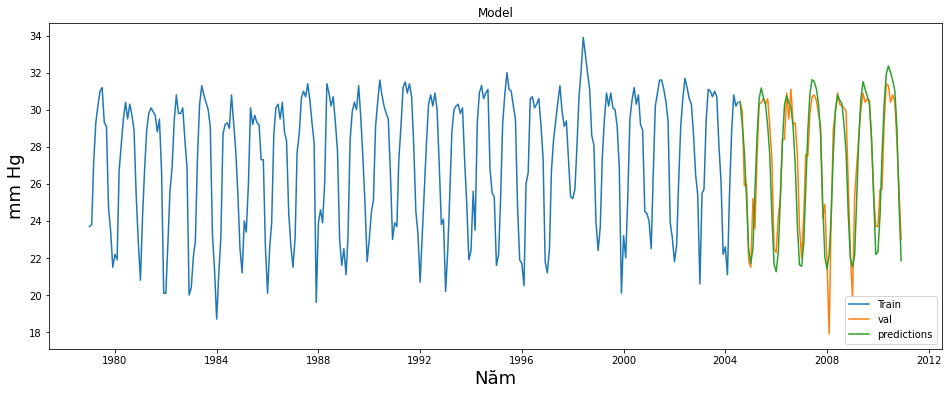

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Năm', fontsize=18)
plt.ylabel("mm Hg", fontsize=18)
plt.plot(train_vi['aH'])
plt.plot(x_test_vi[['aH','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show
print("rmse:",rmse_list[6])

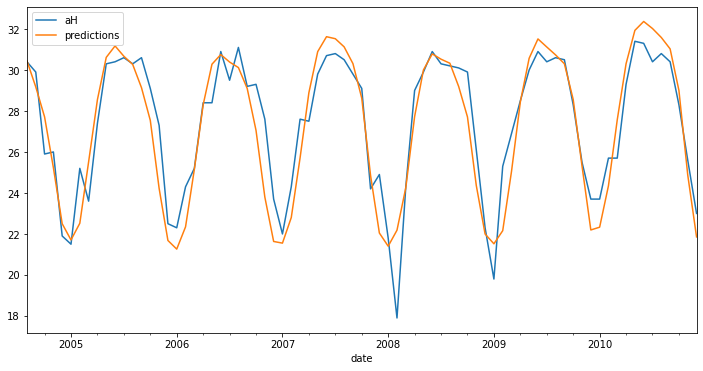

In [ ]:
x_test_vi[['aH','predictions']].iloc[:].plot(figsize=(12,6)).autoscale(axis = 'x', tight=True)